# Case analysis

### Problem Statement

A bike\-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer\-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Business Goal

As a Data analysis, a model is required to predict the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
#Importing all the libraries used to perform the analysis and modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import datetime
import sklearn

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

### The Data Set Dictionary

It has 16 features with the following characteristics:

- **instant:** record index
- **dteday**  : date
- **season**  : season \(1:spring, 2:summer, 3:fall, 4:winter\)
- **yr**  : year \(0: 2018, 1:2019\)
- **mnth**  : month \( 1 to 12\)
- **holiday**  : weather day is a holiday or not \(extracted from [http://dchr.dc.gov/page/holiday\\\-schedule\\](http://dchr.dc.gov/page/holiday%5C-schedule%5C)\)
- **weekday**  : day of the week
- **workingday**  : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit**  :

&gt;&gt;&gt;&gt;&gt;

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist \+ Cloudy, Mist \+ Broken clouds, Mist \+ Few clouds, Mist
3. Light Snow, Light Rain \+ Thunderstorm \+ Scattered clouds, Light Rain \+ Scattered clouds
4. Heavy Rain \+ Ice Pallets \+ Thunderstorm \+ Mist, Snow \+ Fog

- **temp**  : temperature in Celsius
- **atemp** : feeling temperature in Celsius
- **hum** : humidity
- **windspeed** : wind speed
- **casual** : count of casual users
- **registered** : count of registered users
- **cnt** : count of total rental bikes including both casual and registered



In [2]:
# Reading the data set

data = pd.read_csv('day.csv')
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Let's take a look to the null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values and also all the features has their correct type for them


In [4]:
# Looking at essential stadistic measures

data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

It is important to make a note for variable _weathersit_ which the maximum value is 3 and according to metadata file 4 is when weather is categorized as Heavy Rain \+ Ice Pallets \+ Thunderstorm \+ Mist, Snow \+ Fog. This means that there are no users in this dataset that have used a bicycle when weather is category 4. For that reason, we will see only three categories in total for variable _weathersit_ instead of four.


In [5]:
#Verifying weathersit has just 3 categories

data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Plotting some graphs



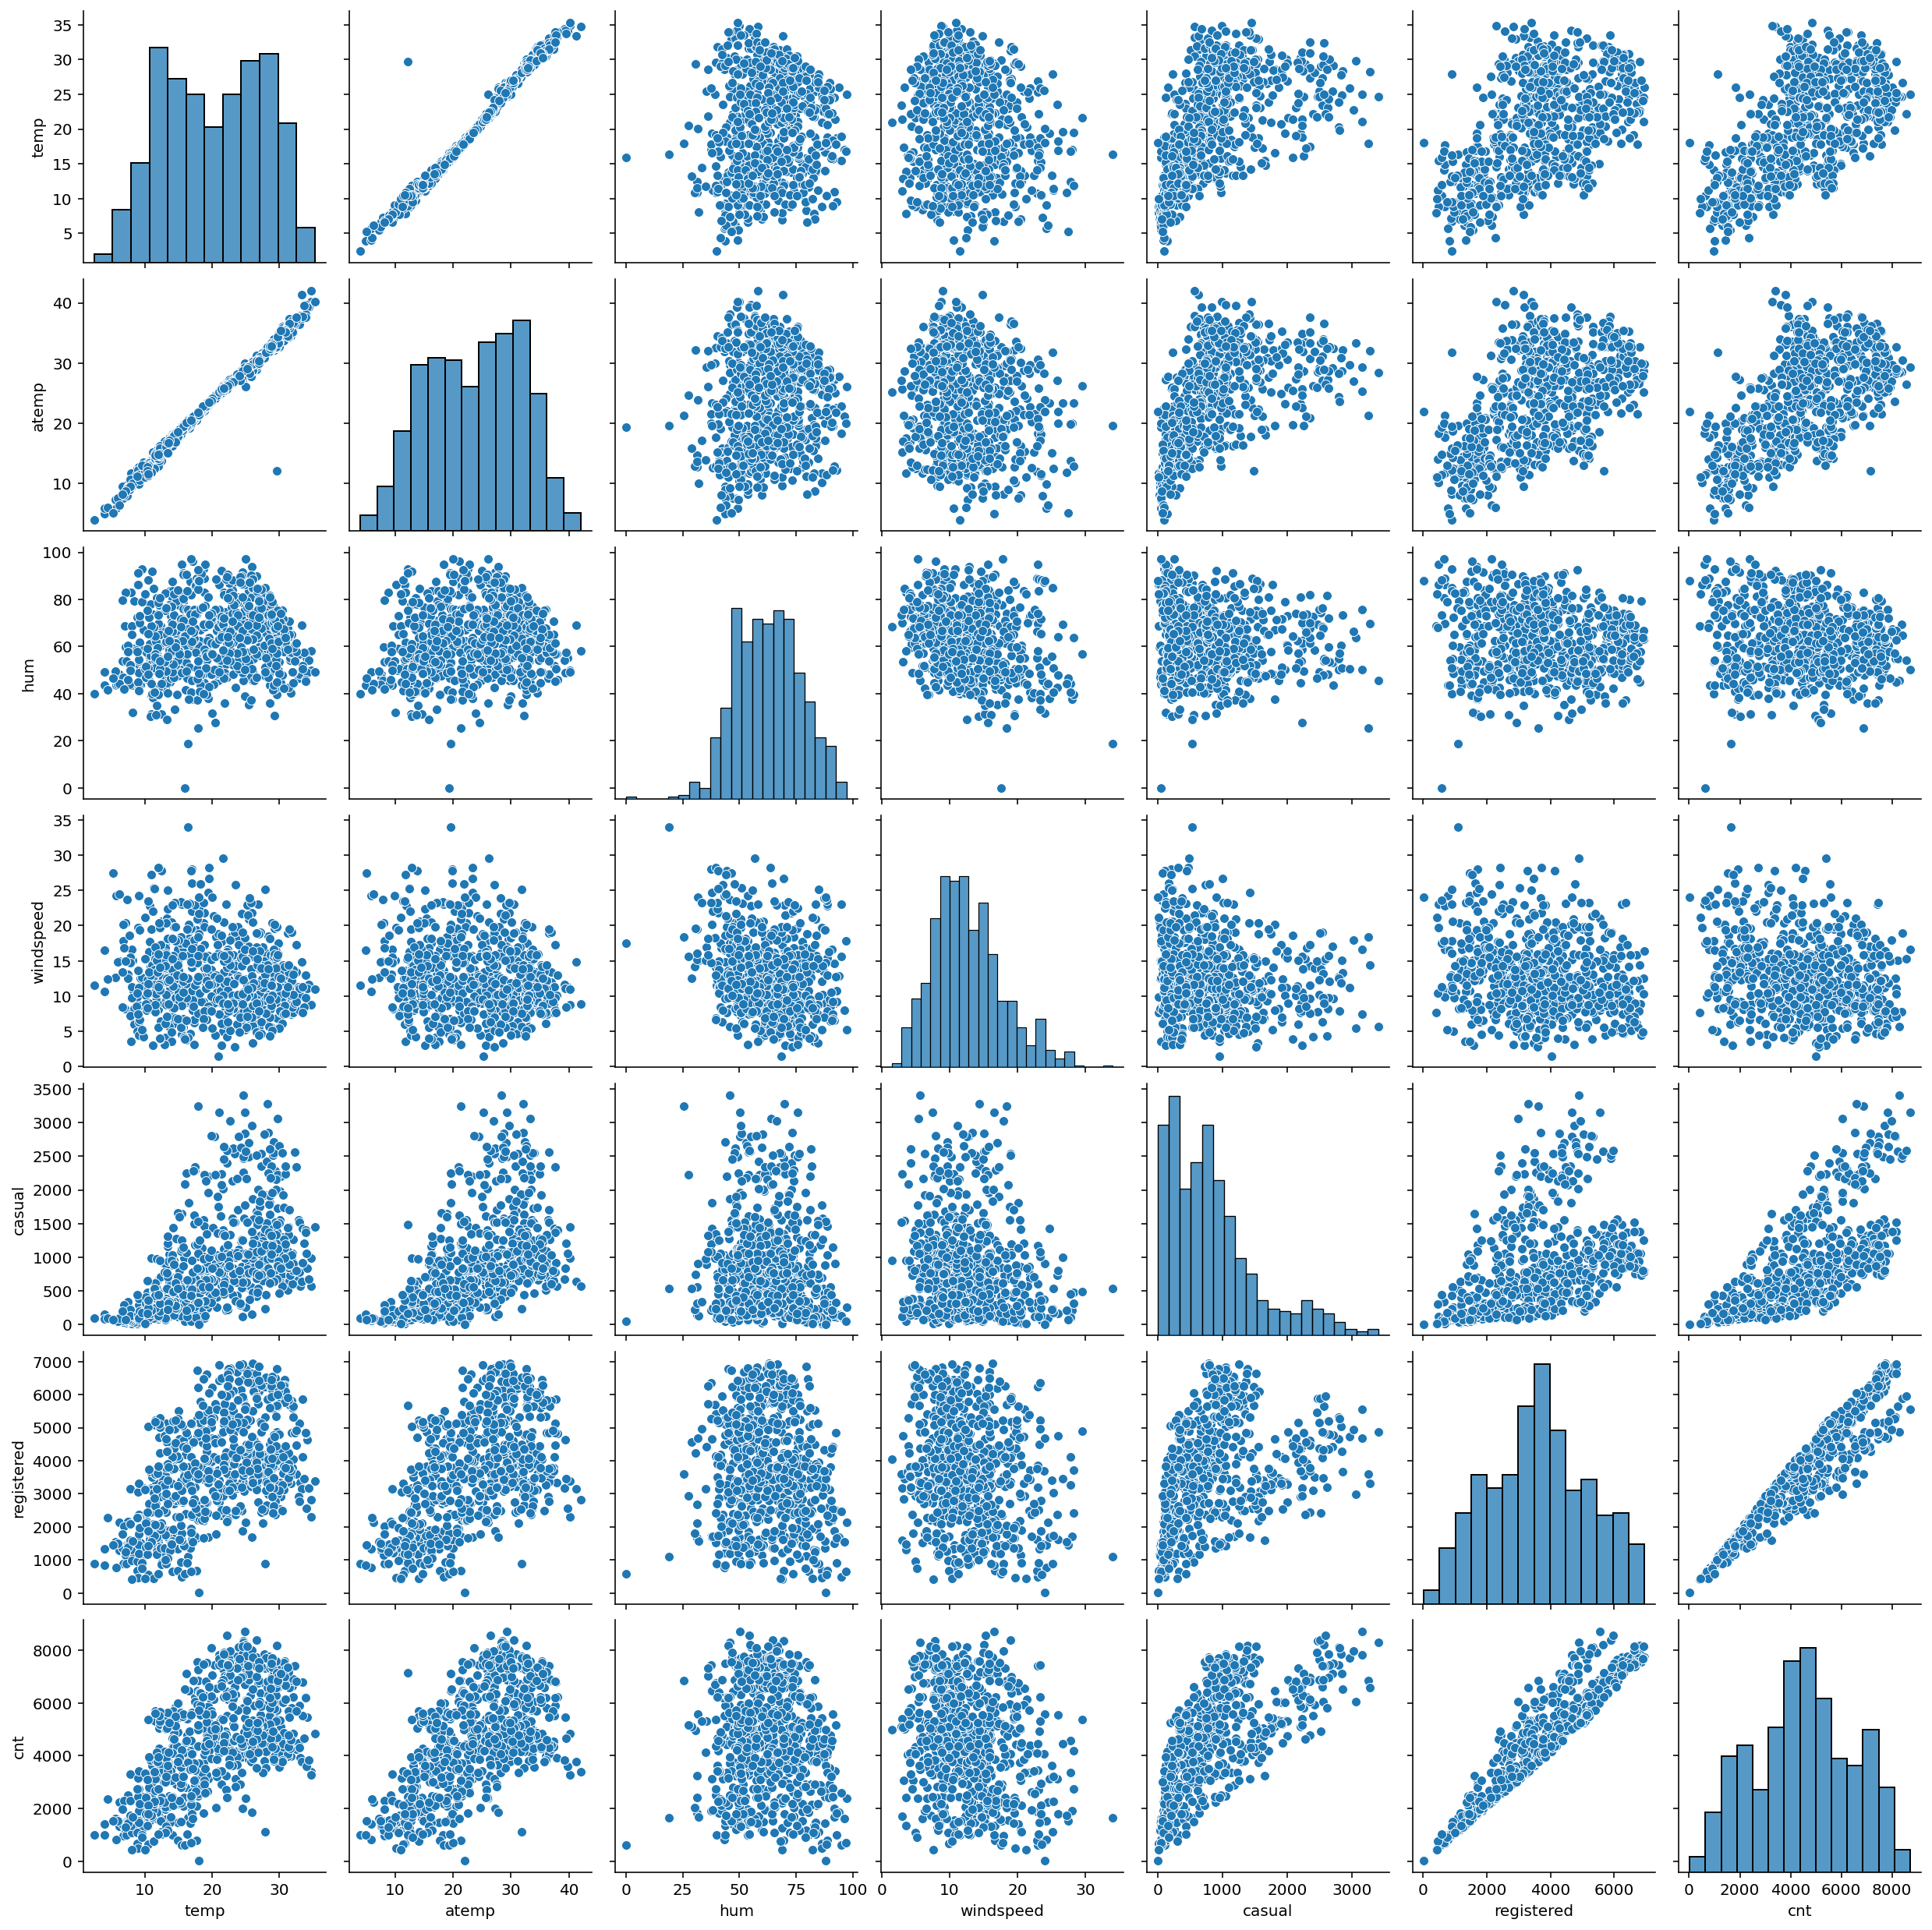

In [6]:
# Plotting some graphs for numerical variables

num_variables = ['temp','atemp','hum','windspeed','casual','registered','cnt']

sns.pairplot(data[num_variables])
plt.show()

##### Remarks from the graphs

1. temp and atemp variables are highly correlated, this is due to the feeling temperature is very close to the actual temperature. Only one point is atypical.
2. Target variable is strong linear correlation with registered variable
3. Target variable has a linear correlation with temp, atemp and casual



In [7]:
# graphs for cathegorical variables

#Change the features to cathegories first

season_dic = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
weather_dic = {1:'Clear&Clouds',2:'Mist&Clouds',3:'Ligth_snow&rain',4:'Heavy_rain&snow'}
month_dic = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
weekday_dic = {0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'}
yr_dic = {0:'2018',1:'2019'}

data['season'] = data['season'].apply(lambda x:season_dic[x])
data['weathersit'] = data['weathersit'].apply(lambda x:weather_dic[x])
data['mnth'] = data['mnth'].apply(lambda x: month_dic[x])
data['weekday'] = data['weekday'].apply(lambda x: weekday_dic[x])
data['yr'] = data['yr'].apply(lambda x: yr_dic[x])

data.head()

instant      dteday  season    yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  spring  2018  Jan        0     Mon           0   
1        2  02-01-2018  spring  2018  Jan        0     Tue           0   
2        3  03-01-2018  spring  2018  Jan        0     Wed           1   
3        4  04-01-2018  spring  2018  Jan        0     Thu           1   
4        5  05-01-2018  spring  2018  Jan        0     Fri           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0   Mist&Clouds  14.110847  18.18125  80.5833  10.749882     331         654   
1   Mist&Clouds  14.902598  17.68695  69.6087  16.652113     131         670   
2  Clear&Clouds   8.050924   9.47025  43.7273  16.636703     120        1229   
3  Clear&Clouds   8.200000  10.60610  59.0435  10.739832     108        1454   
4  Clear&Clouds   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

<Figure size 720x576 with 0 Axes>

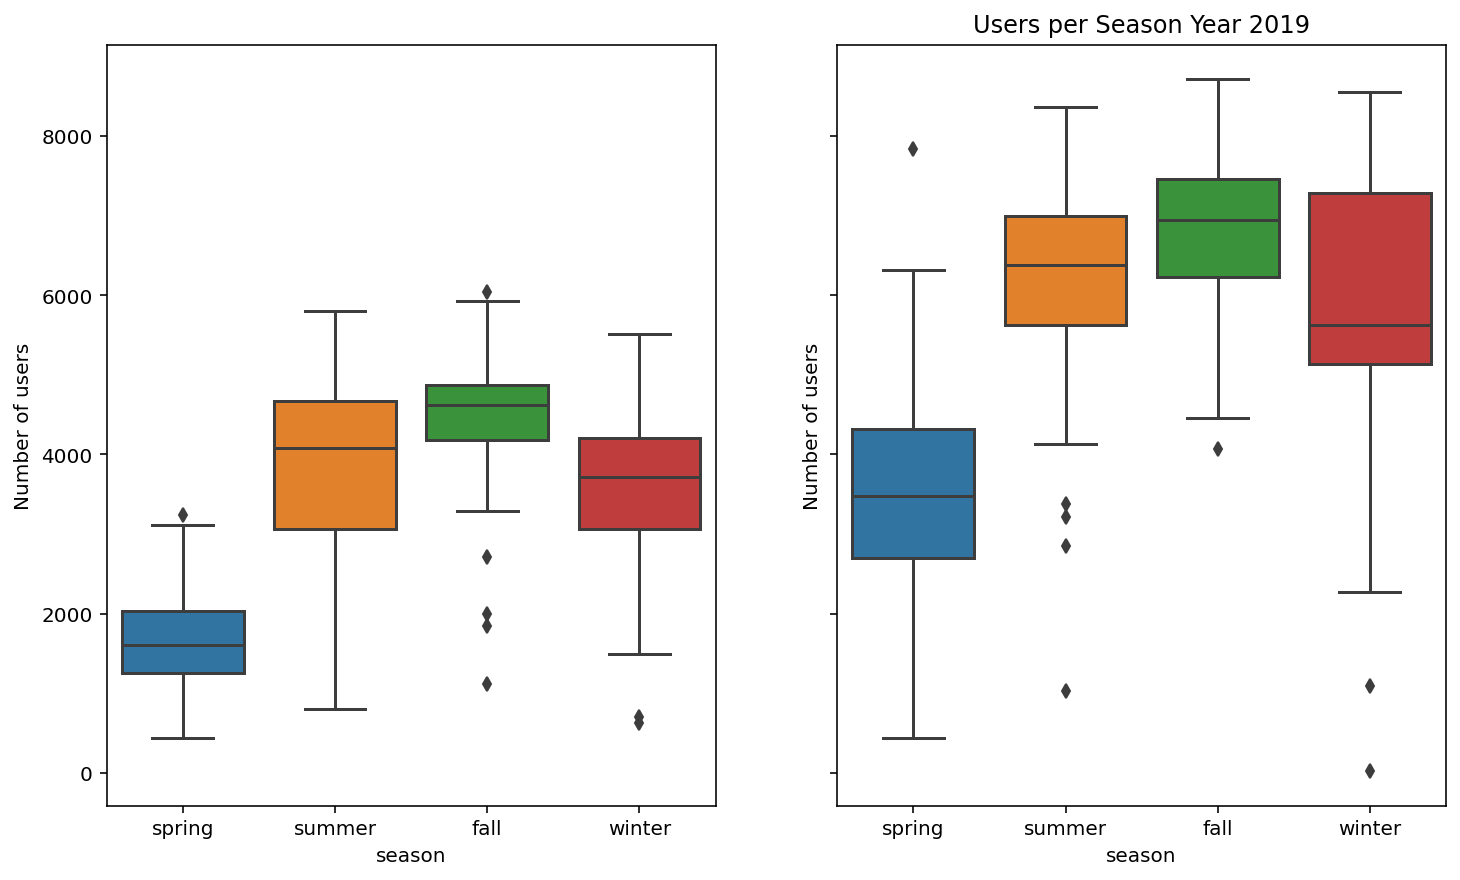

In [8]:
# Plotting season

plt.figure(figsize=(10,8))
f, axes = plt.subplots(1, 2, sharex='col', sharey='row')


sns.boxplot(x='season',y='cnt',data=data[data['yr']=='2018'],ax=axes[0]).set(ylabel='Number of users')
plt.title("Users per Season Year 2018")

sns.boxplot(x='season',y='cnt',data=data[data['yr']=='2019'],ax=axes[1]).set(ylabel='Number of users')

plt.title("Users per Season Year 2019")
plt.show()

Seasons with more users in average are fall and summer, suprisingly the season with less users is spring. However, users for year 2019 is higher than users from 2018


<Figure size 720x576 with 0 Axes>

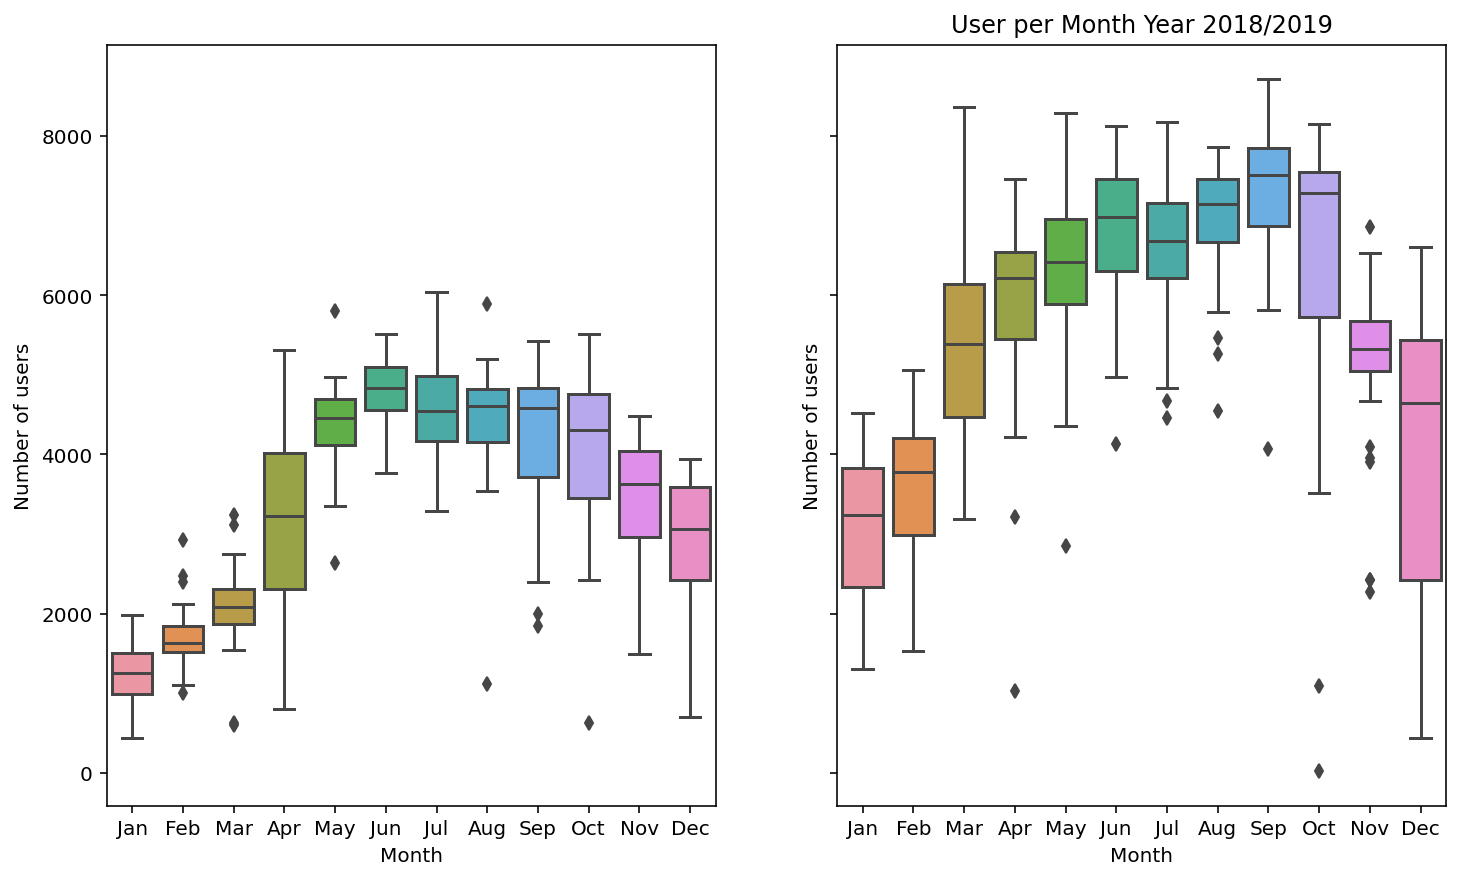

In [9]:
# Plotting months

plt.figure(figsize=(10,8))
f, axes = plt.subplots(1, 2, sharex='col', sharey='row')

plt.title("Users per Season Year 2019")
sns.boxplot(x='mnth',y='cnt',data=data[data['yr']=='2018'],ax=axes[0]).set(xlabel='Month',ylabel='Number of users')
sns.boxplot(x='mnth',y='cnt',data=data[data['yr']=='2019'],ax=axes[1]).set(xlabel='Month',ylabel='Number of users')

plt.title('User per Month Year 2018/2019')
plt.show()

Months with higher users in average are from May to October. The month with less users is January. Again we see the same patter as for season. User numbers is high for year 2019 compared with 2018.


<Figure size 720x576 with 0 Axes>

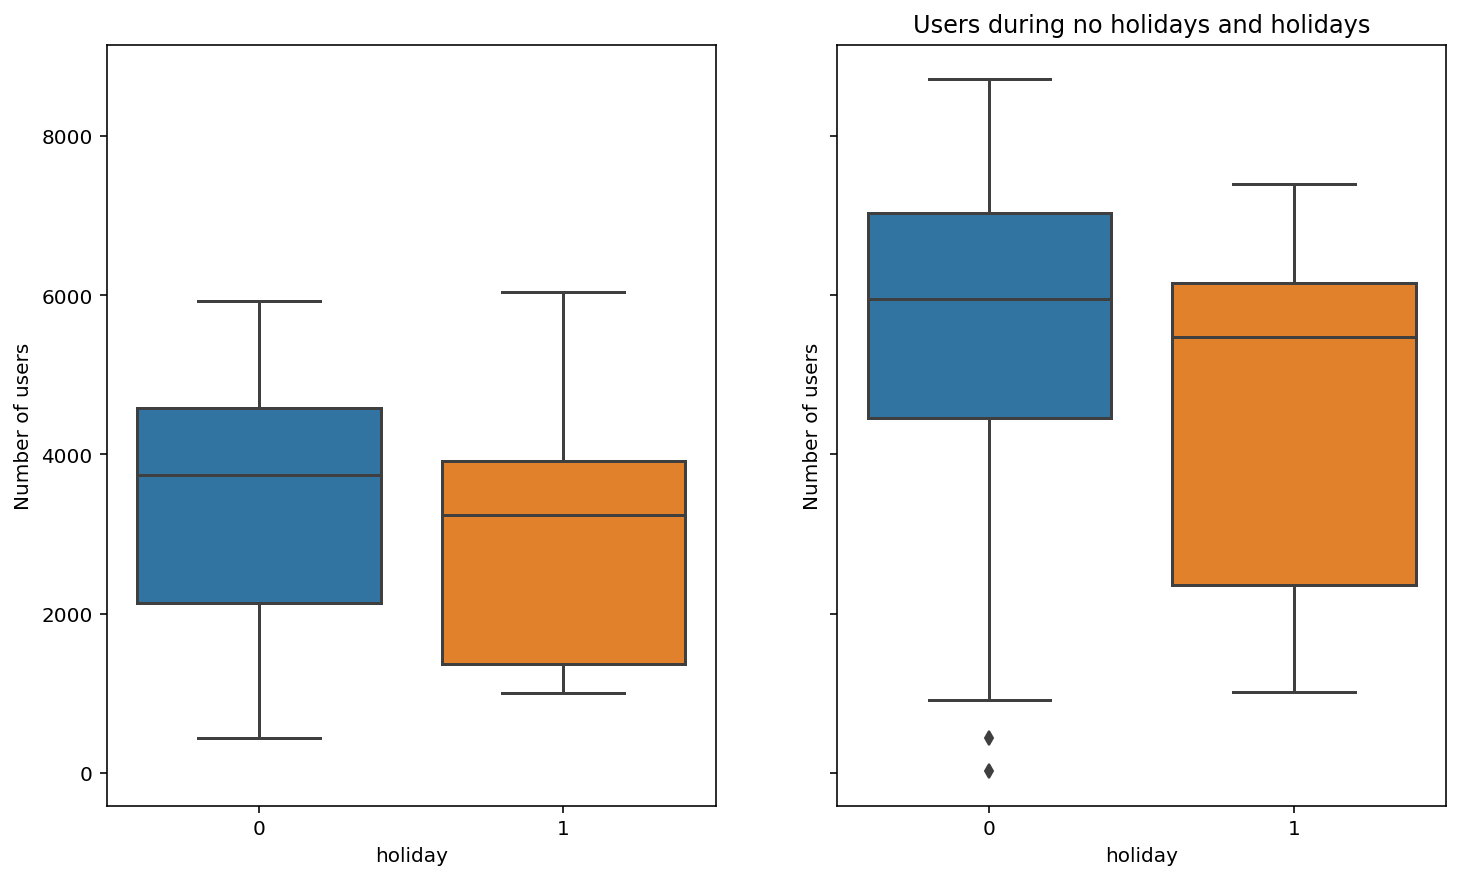

In [10]:
# Plotting holiday

plt.figure(figsize=(10,8))
f, axes = plt.subplots(1, 2, sharex='col', sharey='row')

sns.boxplot(x='holiday',y='cnt',data=data[data['yr']=='2018'],ax=axes[0]).set(ylabel='Number of users')
sns.boxplot(x='holiday',y='cnt',data=data[data['yr']=='2019'],ax=axes[1]).set(ylabel='Number of users')

plt.title('Users during no holidays and holidays')
plt.show()

Holidays compared to no holidays has a slighly difference, with more user on no holidays. 2019 being again the year with more users.


<Figure size 720x576 with 0 Axes>

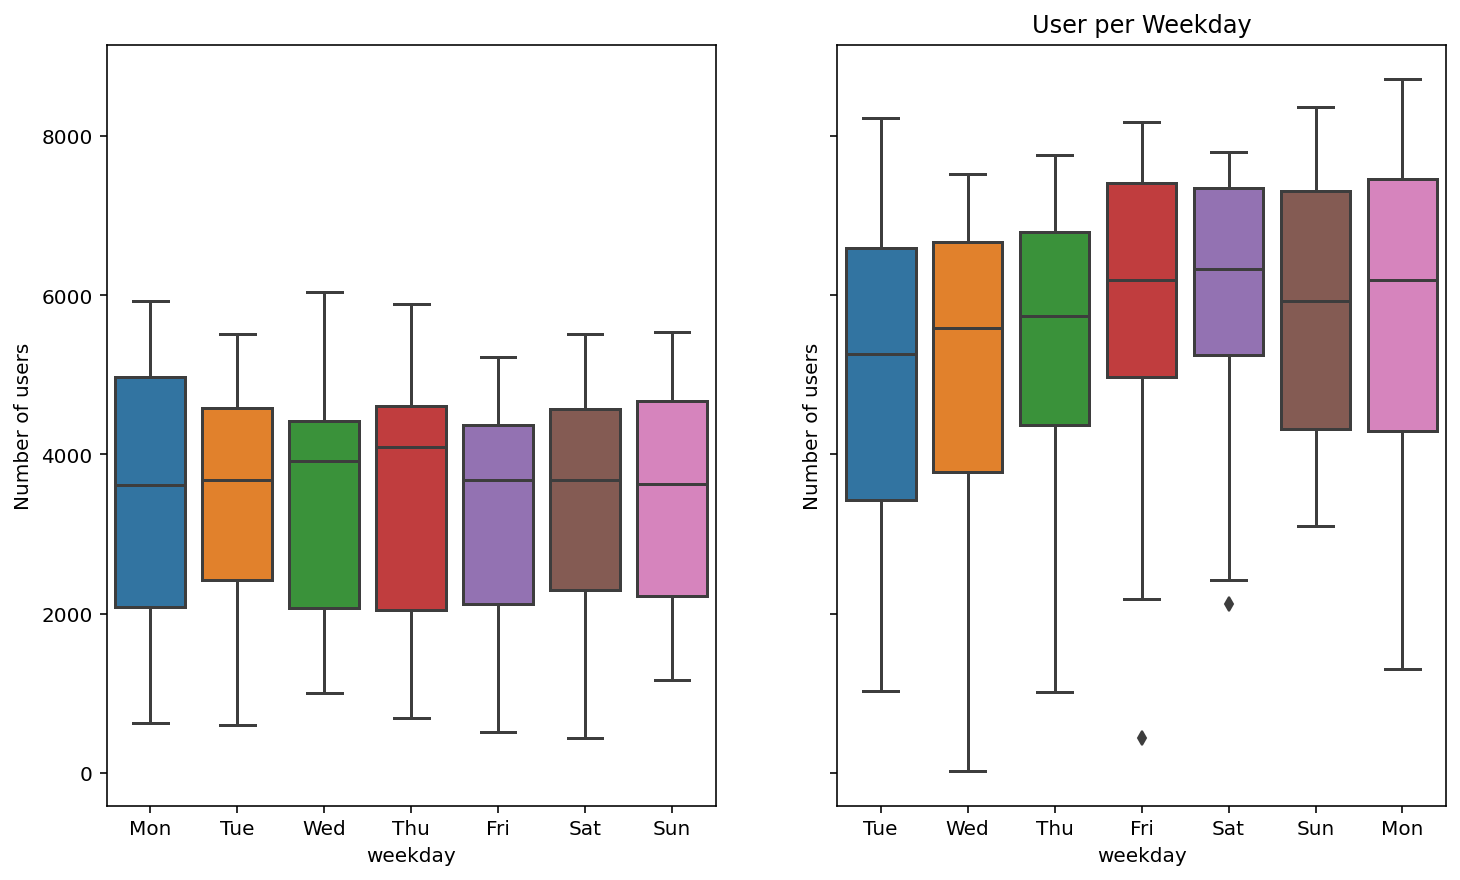

In [11]:
# Plotting weekday

plt.figure(figsize=(10,8))
f, axes = plt.subplots(1, 2, sharex='col', sharey='row')

sns.boxplot(x='weekday',y='cnt',data=data[data['yr']=='2018'],ax=axes[0]).set(ylabel='Number of users')
sns.boxplot(x='weekday',y='cnt',data=data[data['yr']=='2019'],ax=axes[1]).set(ylabel='Number of users')

plt.title('User per Weekday')
plt.show()

Days of the week are not particularly remarkable, there is not a day with preferences on user numbers for 2018. For 2019 Friday, Saturday and Monday are slightly higher than the rest of days.


<Figure size 720x576 with 0 Axes>

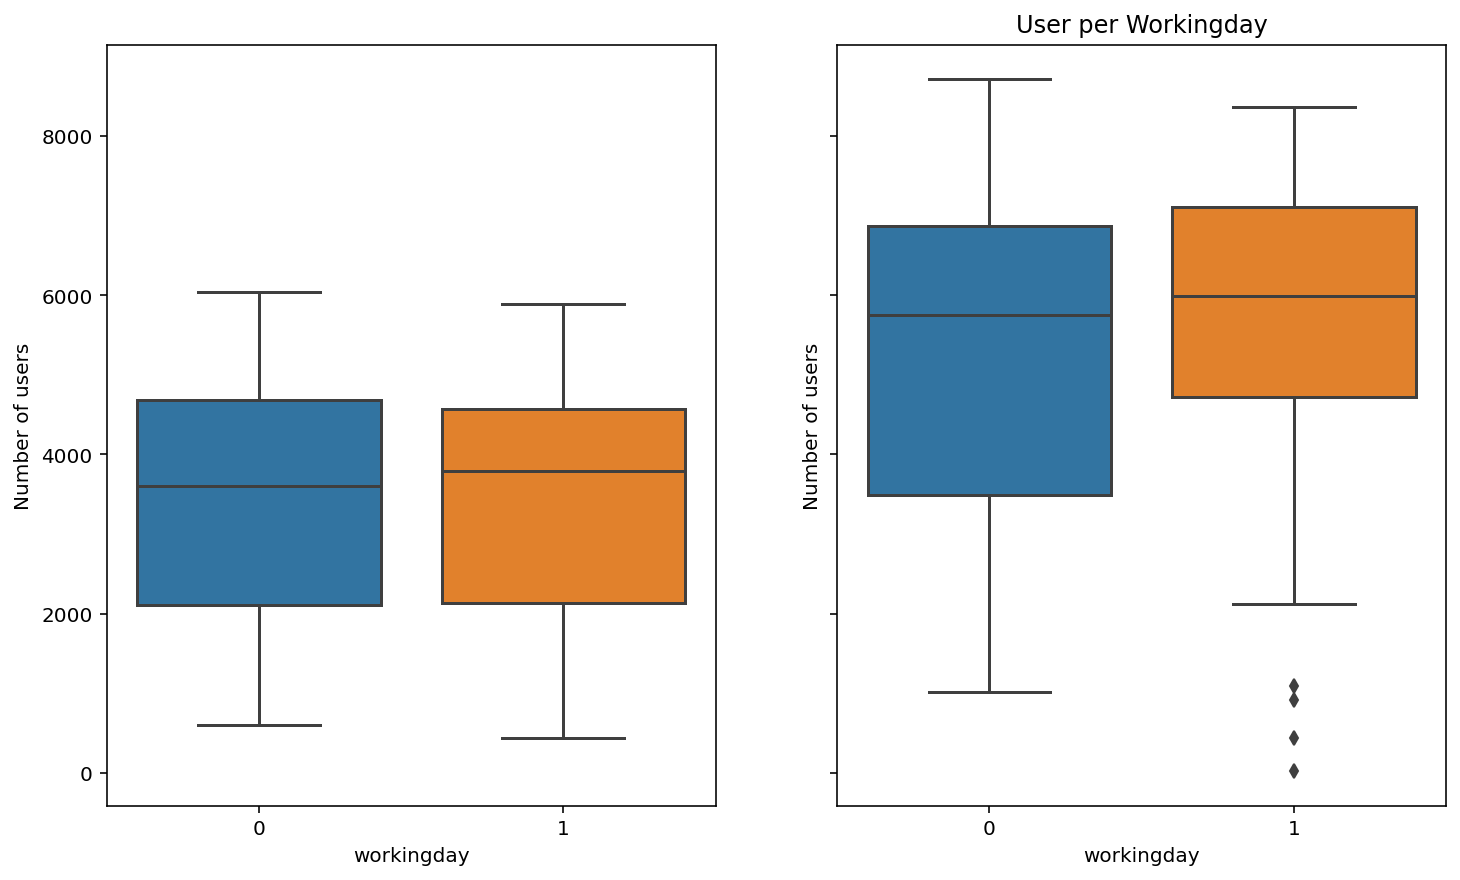

In [12]:
# Plotting working day

plt.figure(figsize=(10,8))
f, axes = plt.subplots(1, 2, sharex='col', sharey='row')

sns.boxplot(x='workingday',y='cnt',data=data[data['yr']=='2018'],ax=axes[0]).set(ylabel='Number of users')
sns.boxplot(x='workingday',y='cnt',data=data[data['yr']=='2019'],ax=axes[1]).set(ylabel='Number of users')

plt.title('User per Workingday')
plt.show()

Working day does not represent a difference in users compared with no working day in average.


<Figure size 720x576 with 0 Axes>

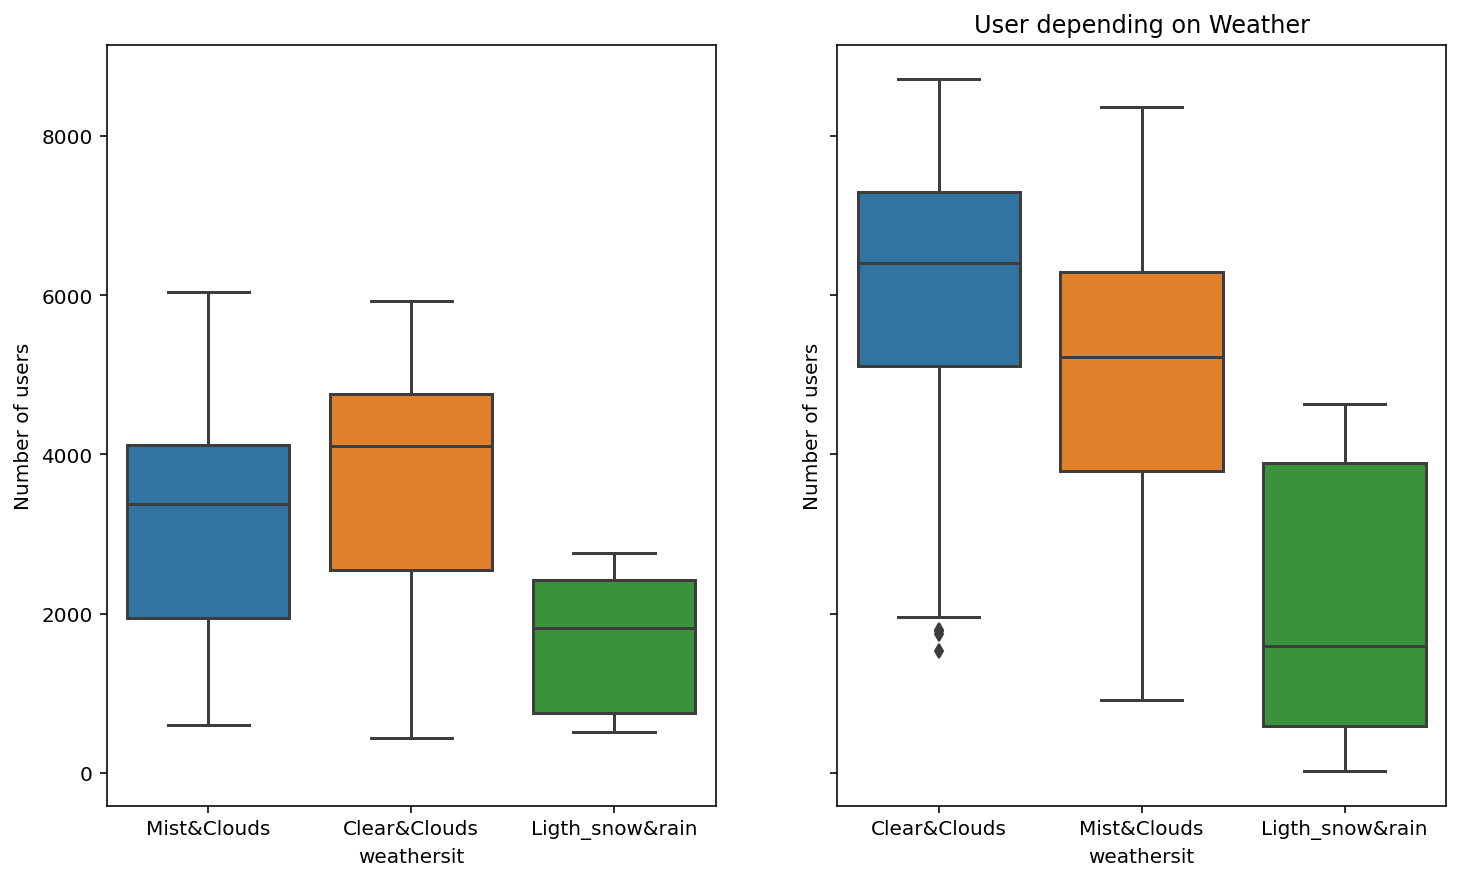

In [13]:
# Plotting weather

plt.figure(figsize=(10,8))
f, axes = plt.subplots(1, 2, sharex='col', sharey='row')

sns.boxplot(x='weathersit',y='cnt',data=data[data['yr']=='2018'],ax=axes[0]).set(ylabel='Number of users')
sns.boxplot(x='weathersit',y='cnt',data=data[data['yr']=='2019'],ax=axes[1]).set(ylabel='Number of users')

plt.title('User depending on Weather')
plt.show()

Weather makes a difference in users behave. It is clear that the number of users is low when snow and poure rain is present. This match with users using less bicycle during winter time and months like January. Nevertheless, when wheater is clear or when are some clouds is very similar to the user numbers as when is cloudy or mist.



#### Remarks From Graphs

For categorical variables is noticeable that year is really important, and this is because the weather is not same for years, which leads to change in how users behave..

Through all the graphs we have notice that the difference between data from 2018 and 2019 is different and in the majority of cases the number of users is higher for year 2019. Let's analyze numerical data making this distintion.



<Figure size 720x576 with 0 Axes>

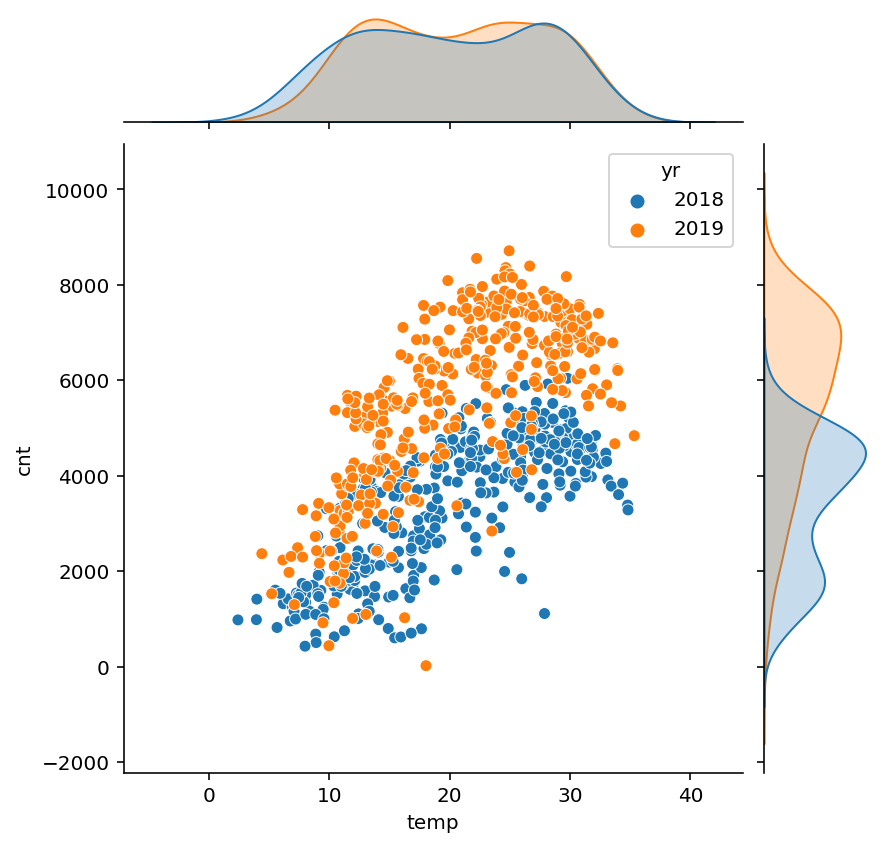

In [14]:
# Plotting temp

plt.figure(figsize=(10,8))
sns.jointplot(x='temp',y='cnt',data=data,hue='yr')

plt.show()

<Figure size 720x576 with 0 Axes>

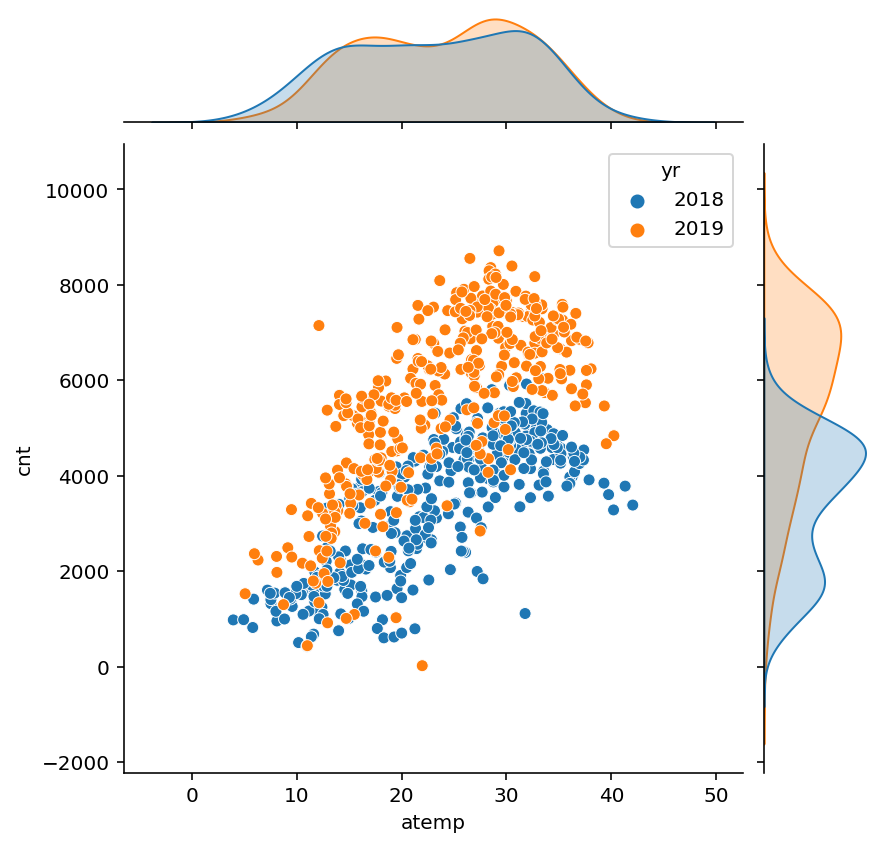

In [15]:
# Plotting atemp (feeling temperature)

plt.figure(figsize=(10,8))
sns.jointplot(x='atemp',y='cnt',data=data,hue='yr')

plt.show()

<Figure size 720x576 with 0 Axes>

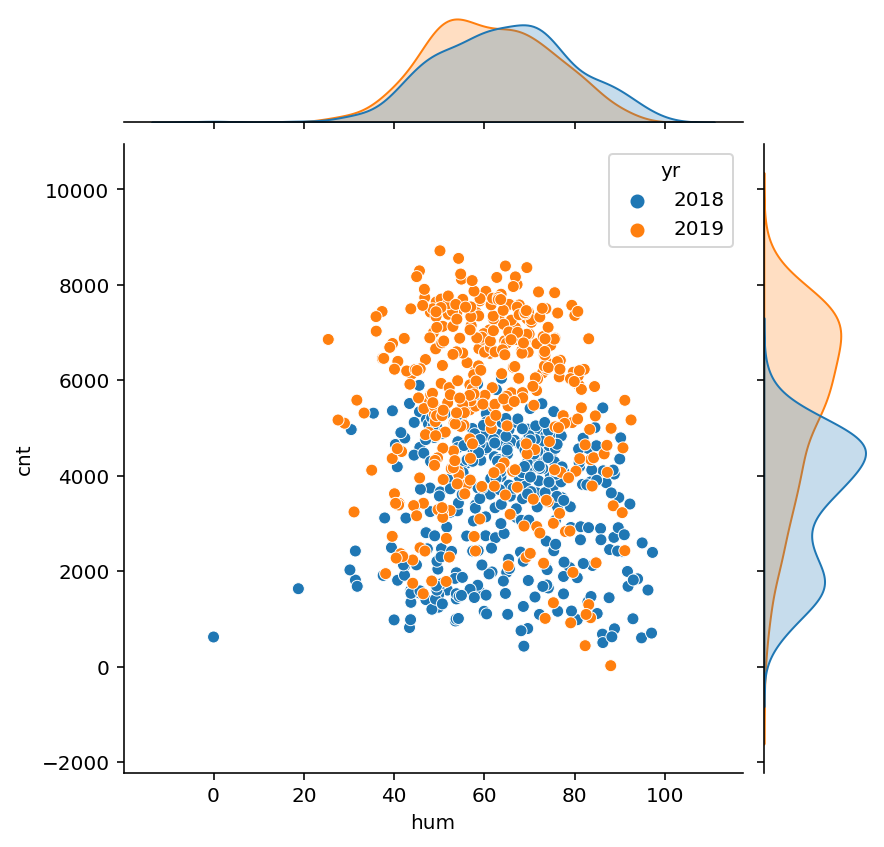

In [16]:
# Plotting humidity

plt.figure(figsize=(10,8))
sns.jointplot(x='hum',y='cnt',data=data,hue='yr')

plt.show()

<Figure size 720x576 with 0 Axes>

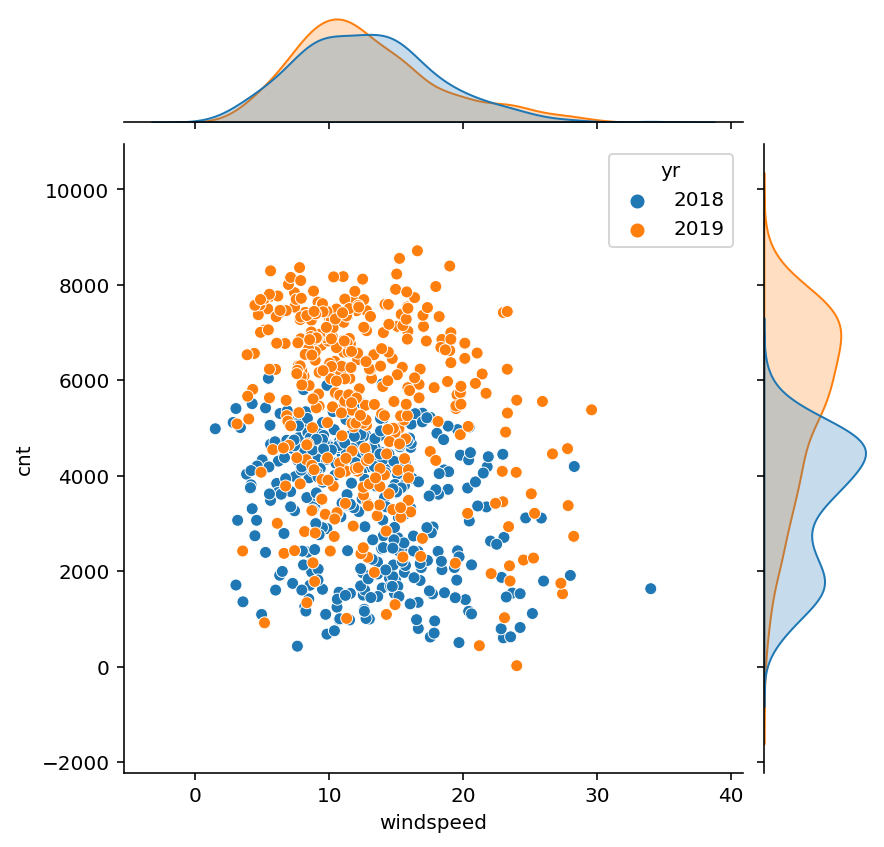

In [17]:
# Plotting windspeed

plt.figure(figsize=(10,8))
sns.jointplot(x='windspeed',y='cnt',data=data,hue='yr')

plt.show()

#### Remarks from Graphs

It is remarkable how the year is influencing so much in number of users even when temperature is the same. 


/tmp/ipykernel_543/3352956402.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='Blues',annot=True)


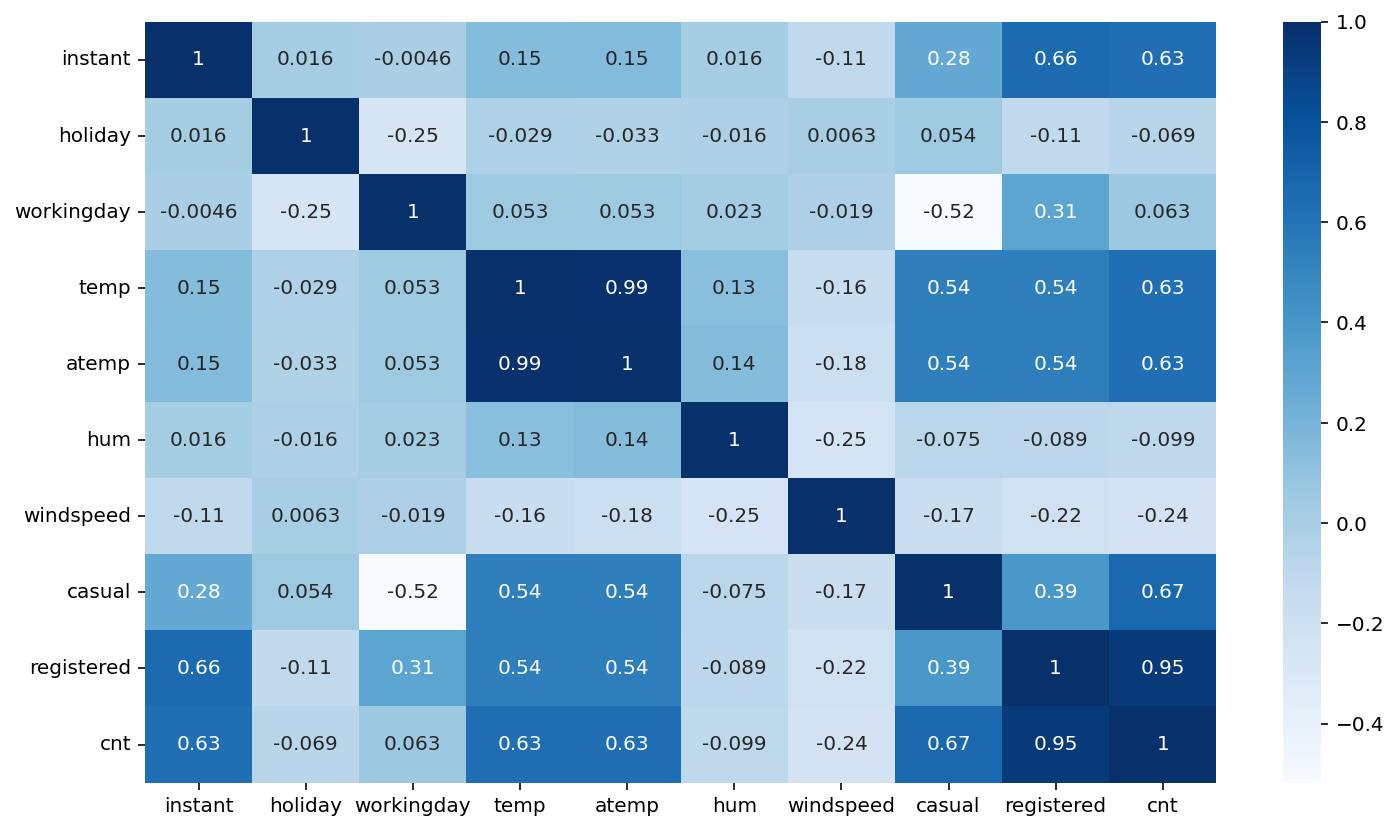

In [18]:
# Let's take a look at the correlation between variables using heatmap

sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.show()

From the heatmap, we can notice that temp and atemp are highly correlated, same as year and instant, and season and month.

Now the only variable highly correlated with the target is  registered 



# Feature engineering

In this stage, some features will be modify to provided better inputs in the model.

The following variables will suffer a change accordingly:

- instant is an index, then it will be dropped
- dteday will be dropped
- yr will be transform to dummy
- season will be transform to dummy
- mnth will be transform to dummy
- weekday will be transform to dummy
- weathersit will be transformed to dummy
- temp will be normalized
- atemp will be dropped because it is highly correlated with temp
- hum will be normalized
- windspeed will be normalized
- casual will be dropped 
- registered will be dropped

One important detail to mention is why _casual_ and _registered_ will be dropped. The counting of those variables is unknown until the end of the day and the addition of them is the target variable. In other words, casual and registered total user is what it is going to be predicted. For that reason, they cannot take in count as features for predicting _cnt._ It is like a tautology, using the answer to find the answer.



### Dropping Variables



In [19]:
# Let's drop instant, casual and registered

data.drop(['instant','casual','registered','atemp','dteday'],axis=1,inplace=True)

### Dummy Variables Creation



In [20]:
# Convertir season, month, weekday and weathersit to dummies
season_dum = pd.get_dummies(data['season'],drop_first=True)
weather_dum = pd.get_dummies(data['weathersit'],drop_first=True)
mnth_dum = pd.get_dummies(data['mnth'])
weekday_dum = pd.get_dummies(data['weekday'])
yr_dum = pd.get_dummies(data['yr'])

# Adding the dummies to the data set
data[sorted(season_dum)] = season_dum
data[sorted(weather_dum)] = weather_dum
data[sorted(mnth_dum)] = mnth_dum
data[sorted(weekday_dum)] = weekday_dum
data[sorted(yr_dum)] = yr_dum

# Dropping column season and weathersit
data.drop(['season','weathersit','mnth','weekday','yr'],axis=1,inplace=True)

data.head(2)

holiday  workingday       temp      hum  windspeed  cnt  spring  summer  \
0        0           0  14.110847  80.5833  10.749882  985       1       0   
1        0           0  14.902598  69.6087  16.652113  801       1       0   

   winter  Ligth_snow&rain  ...  Sep  Fri  Mon  Sat  Sun  Thu  Tue  Wed  2018  \
0       0                0  ...    0    0    1    0    0    0    0    0     1   
1       0                0  ...    0    0    0    0    0    0    1    0     1   

   2019  
0     0  
1     0  

[2 rows x 32 columns]

### Outliers

During this stage, numerical variables will be analyzed to drop outliers


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x576 with 0 Axes>

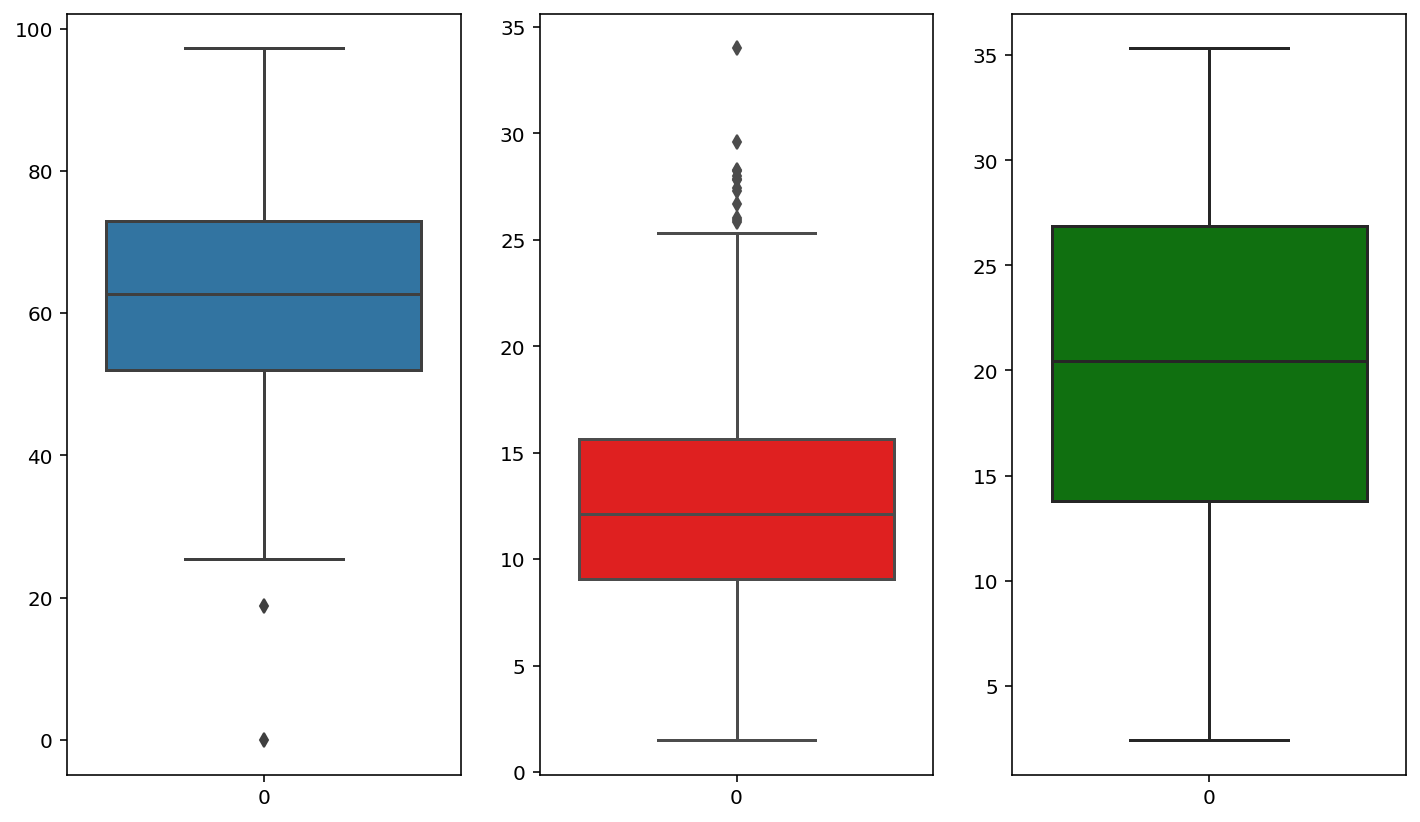

In [21]:
# Ploting numerical variables to look for outliers
plt.figure(figsize=(10,8))
f, axes = plt.subplots(1, 3)

sns.boxplot(data['hum'],ax=axes[0])
sns.boxplot(data['windspeed'],ax=axes[1],color='Red')
sns.boxplot(data['temp'],ax=axes[2],color='Green')


plt.show

Only humidity and windspeed has outliers. To drop them, Interquartile Range \(IQR\) formula will be used. $IQR = Q3 - Q1$ . The outliers will be all those values below $Q1 - 1.5 IQR$ 


In [22]:
# Calculating quartiles and IQR for hum
Q1_hum = np.percentile(data['hum'],0.25) 
Q3_hum = np.percentile(data['hum'],0.75)
IQR_hum = Q3_hum - Q1_hum
hum_outliers = Q1_hum - 1.5 * IQR_hum

# Calculating quartiles and IQR for windspeed
Q1_wind = np.percentile(data['windspeed'],0.25)
Q3_wind = np.percentile(data['windspeed'],0.75)
IQR_wind = Q3_wind - Q1_wind
windspeed_outliers = Q1_wind - 1.5 * IQR_wind

# Printing the number of points that will be erased from dataset
print(data[(data['hum']<hum_outliers) | (data['windspeed']<windspeed_outliers)]['hum'].count())

# Eliminating outliers
data = data[~((data['hum']<hum_outliers) | (data['windspeed']<windspeed_outliers))].reset_index(drop=True)

2


In [23]:
# Moving target value at the end of the set

column_to_move = data.pop("cnt")

# insert column again

data.insert(31, "cnt", column_to_move)

### Data Standardization

For this data, the method set for standardization will be StandardScaler which centers the data by subtracting the mean of a variable from each observation and dividing it by the variable’s standard deviation.



In [24]:
scaler = StandardScaler()
st_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

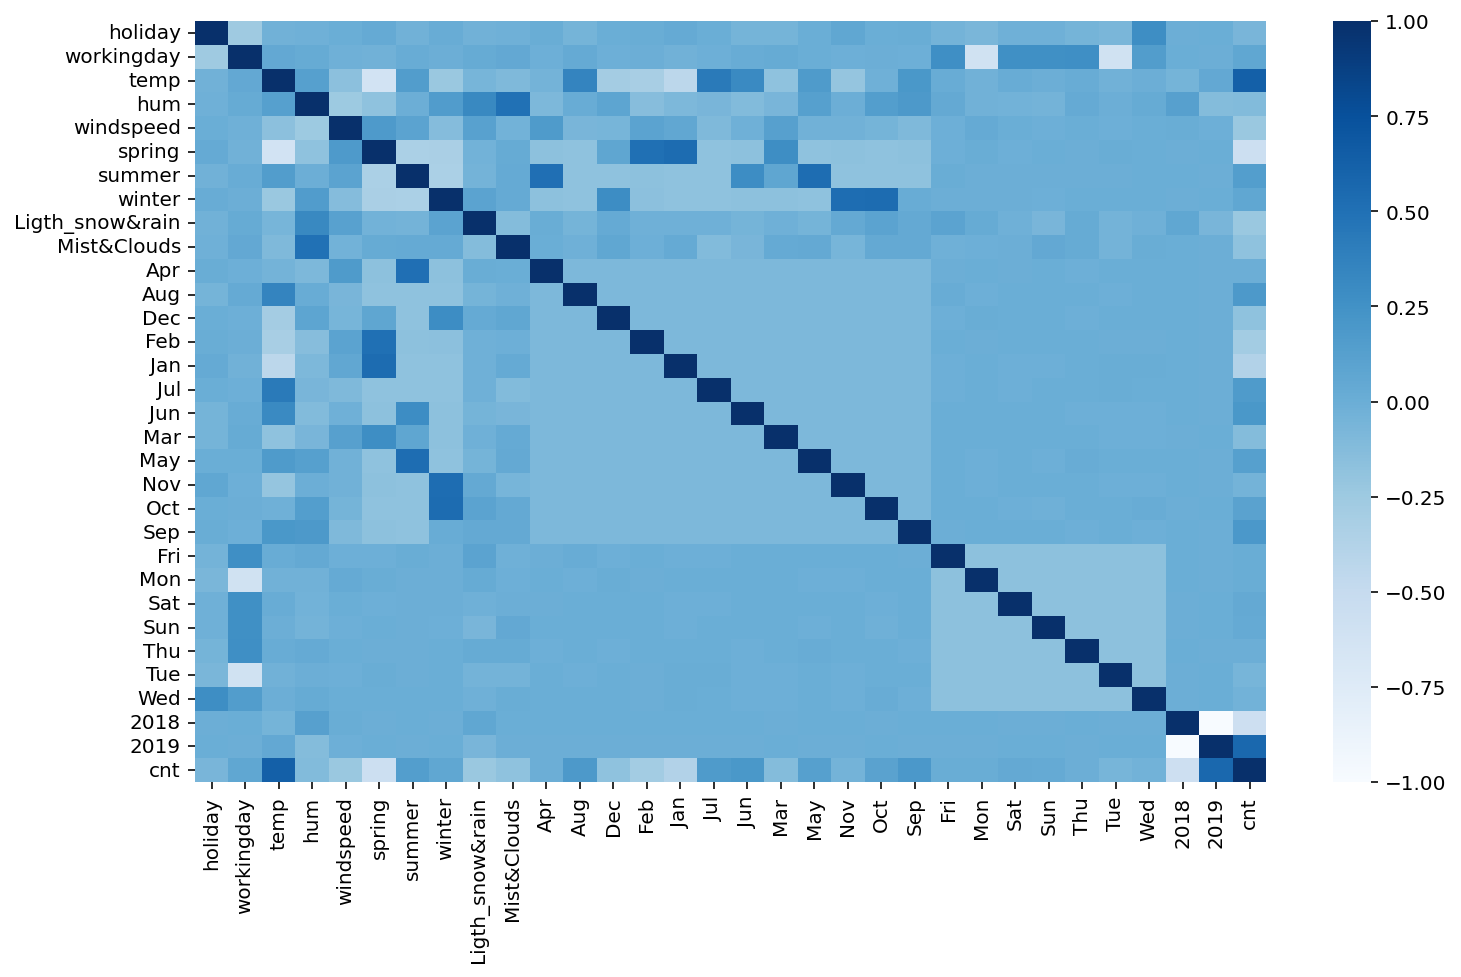

In [25]:
# Let's take a look at the correlation between variables to pick features for the model

sns.heatmap(st_data.corr(),cmap='Blues')
plt.show()

# Modeling

The following section is dedicated to all the steps regarding modeling.

- Splitting data
- RFE
- Fitting the model
- Analyzing statistic results \(p\-values, Prob\(F\-statistics\)\)
- VIF



### Model Number 1

This model uses RFE to select the best 15 features and then discard variables evaluating first p\-values and then using VIF



In [26]:
#Separating features in independent and target
X = data.drop('cnt',axis=1)
y = data['cnt']

# Splitting train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=13)

In [27]:
# RFE

lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)
rfe = RFE(lm_model,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)
fea_rank = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
fea_rank

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 8),
 ('hum', False, 17),
 ('windspeed', False, 14),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', False, 3),
 ('Ligth_snow&rain', True, 1),
 ('Mist&Clouds', True, 1),
 ('Apr', False, 10),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', True, 1),
 ('Mar', False, 11),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Fri', False, 16),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 7),
 ('Thu', False, 6),
 ('Tue', True, 1),
 ('Wed', False, 5),
 ('2018', True, 1),
 ('2019', True, 1)]

Notice that the variables selected by RFE are 15, all with ranking of 1 indicates that they are important. For that reason the variables to select are:

- holdiay
- workingday
- spring
- Ligth\_snow&rain
- Mist&Clouds
- Dec
- Feb
- Jan
- Jun
- Nov
- Sep
- Mon
- Tue
- 2018
- 2019

The next step is reduce the number of features using p\-values and VIF


In [28]:
#selecting features that REF showed with rank 1
features = [i[0] for i in fea_rank if i[-1]==1]

#Separating features in independent and target
X = data[features]
y = data['cnt']

# Splitting train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=13)

In [29]:
# Adding a constant 
X_train_sm = sm.add_constant(X_train)

# Fitting the model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.83e-154
Time:                        17:55:25   Log-Likelihood:                -4177.6
No. Observations:                 509   AIC:                             8383.
Df Residuals:                     495   BIC:                             8442.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3028.3723     49.837     60.766      0.000    2930.455    3126.290
holiday           444.7428    193.117      2.303      0.022      65.312     824.173
workingday        992.8758     72.753     13.647      0.000     849.933    1135.819
spring          -1753.3509    159.327    -11.005      0.000   -2066.391   -1440.311
Ligth_snow&rain -2942.8835    258.702    -11.376      0.000   -3451.173   -2434.594
Mist&Clouds      -757.9456     85.766     -8.837      0.000    -926.456    -589.435
Dec              -944.5290    153.190     -6.166      0.000   -1245.512    -643.546
Feb              -726.2545    207.761     -3.496      0.001   -1134.457    -318.052
Jan             -1198.1779    204.842     -5.849      0.000   -1600.644    -795.711
Jun               571.0615    154.873      3.687      0.000     266.771     875.352
Nov              -969.0783    149.634     -6.476      0.000   -1263.075    -675.081
Sep               778.5180    154.944      5.025      0.000     474.089    1082.947
Mon               974.7833    100.104      9.738      0.000     778.103    1171.464
Tue               615.9704    100.336      6.139      0.000     418.833     813.107
2018              449.5548     47.575      9.449      0.000     356.081     543.029
2019             2578.8175     46.976     54.896      0.000    2486.520    2671.115
==============================================================================
Omnibus:                       82.563   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.853
Skew:                          -0.750   Prob(JB):                     1.02e-56
Kurtosis:                       6.148   Cond. No.                     5.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.96e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R adjusted is 0.776 which is a pretty good number because the model is explaining the 77.6% of the data. The Prob\(F\-statistics\) is small which indicates that the model is significant.

There are no variables with p\-values above 0.05



R adjusted is 0.828 which is a pretty good number because the model is explaining the 82.8% of the data. The Prob\(F\-statistics\) is small which indicates that the model is significant.

The p\-value for coefficients in some variables are above 0.05 which means they are insignificant and we should delete those variables. The features which p\-value above 0.05 are month and workingday.



Let's corroborate that there are not multicollinearity among the features by using Variance Inflation Factor \(VIF\)


In [30]:
# Calculating VIF

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


features   VIF
0           holiday   inf
1        workingday   inf
11              Mon   inf
12              Tue   inf
13             2018   inf
14             2019   inf
2            spring  2.97
7               Jan  2.12
6               Feb  2.05
5               Dec  1.14
8               Jun  1.09
9               Nov  1.09
10              Sep  1.09
3   Ligth_snow&rain  1.05
4       Mist&Clouds  1.04

There some variable with VIF with infinit value, this means they are perfectly correlated and it is necessary to drop those features which are: holiday, working day, Mon, Tue, 2018 and 2019



Three features has VIF values above 5, humidity, temperature and windspeed. Let's see how the model change removing these three features


In [31]:
#Separating features in independent and target
X = X.drop(['holiday','Mon','workingday','Tue','2018','2019'],axis=1)
y = data['cnt']

# Splitting train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=13)

# Adding a constant 
X_train_sm = sm.add_constant(X_train)

# Fitting the model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     48.40
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.56e-62
Time:                        17:55:25   Log-Likelihood:                -4405.5
No. Observations:                 509   AIC:                             8831.
Df Residuals:                     499   BIC:                             8873.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5487.8010    102.358     53.614      0.000    5286.696    5688.906
spring          -1645.4472    248.043     -6.634      0.000   -2132.784   -1158.111
Ligth_snow&rain -3442.2400    400.166     -8.602      0.000   -4228.457   -2656.023
Mist&Clouds      -695.6143    133.161     -5.224      0.000    -957.240    -433.988
Dec              -908.8380    238.586     -3.809      0.000   -1377.596    -440.080
Feb              -843.6015    323.562     -2.607      0.009   -1479.314    -207.889
Jan             -1388.7387    318.568     -4.359      0.000   -2014.638    -762.839
Jun               341.0122    240.445      1.418      0.157    -131.397     813.421
Nov             -1043.8941    232.698     -4.486      0.000   -1501.083    -586.705
Sep               639.3030    241.004      2.653      0.008     165.796    1112.810
==============================================================================
Omnibus:                       18.330   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.664
Skew:                           0.022   Prob(JB):                       0.0131
Kurtosis:                       2.362   Cond. No.                         8.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R square dropped to 0.733 and there is one variable with high p\-value which is day



### Model Number 2

Let's use the same selection of features that REF did for model 1 and create another model, but this time first eliminating features using VIF and then by p\-values


In [32]:
#selecting features that REF showed with rank 1
features = [i[0] for i in fea_rank if i[-1]==1]

#Separating features in independent and target
X = data[features]
y = data['cnt']


# Splitting train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=13)

In [33]:
#Calculating VIF

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


features   VIF
0           holiday   inf
1        workingday   inf
11              Mon   inf
12              Tue   inf
13             2018   inf
14             2019   inf
2            spring  2.97
7               Jan  2.12
6               Feb  2.05
5               Dec  1.14
8               Jun  1.09
9               Nov  1.09
10              Sep  1.09
3   Ligth_snow&rain  1.05
4       Mist&Clouds  1.04

There are four features with VIF above 5, which are holiday, workingday, Mon, Tue, 2018 and 2019. They will be eliminated and then p\-values will be calculated



In [34]:
#Separating features in independent and target
X =  X.drop(['holiday','Mon','workingday','Tue','2018','2019'],axis=1)
y = data['cnt']

# Splitting train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=13)

# Adding a constant 
X_train_sm = sm.add_constant(X_train)

# Fitting the model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     48.40
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.56e-62
Time:                        17:55:25   Log-Likelihood:                -4405.5
No. Observations:                 509   AIC:                             8831.
Df Residuals:                     499   BIC:                             8873.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5487.8010    102.358     53.614      0.000    5286.696    5688.906
spring          -1645.4472    248.043     -6.634      0.000   -2132.784   -1158.111
Ligth_snow&rain -3442.2400    400.166     -8.602      0.000   -4228.457   -2656.023
Mist&Clouds      -695.6143    133.161     -5.224      0.000    -957.240    -433.988
Dec              -908.8380    238.586     -3.809      0.000   -1377.596    -440.080
Feb              -843.6015    323.562     -2.607      0.009   -1479.314    -207.889
Jan             -1388.7387    318.568     -4.359      0.000   -2014.638    -762.839
Jun               341.0122    240.445      1.418      0.157    -131.397     813.421
Nov             -1043.8941    232.698     -4.486      0.000   -1501.083    -586.705
Sep               639.3030    241.004      2.653      0.008     165.796    1112.810
==============================================================================
Omnibus:                       18.330   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.664
Skew:                           0.022   Prob(JB):                       0.0131
Kurtosis:                       2.362   Cond. No.                         8.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted R squared is 0.456 which means that the data is being explained by the model by 45.6%. Prob\(F\-statistics\) is low, which means the model is significant. Evaluating p\-values above 0.05, it determinates that the features that are not significant is Jun. 

After eliminating that variable the model will be as follow:


In [35]:
#Separating features in independent and target
X =  X.drop('Jun',axis=1)
y = data['cnt']

# Splitting train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=13)

# Adding a constant 
X_train_sm = sm.add_constant(X_train)

# Fitting the model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     54.09
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           5.50e-63
Time:                        17:55:25   Log-Likelihood:                -4406.5
No. Observations:                 509   AIC:                             8831.
Df Residuals:                     500   BIC:                             8869.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5541.4775     95.200     58.209      0.000    5354.436    5728.518
spring          -1680.5517    247.054     -6.802      0.000   -2165.943   -1195.160
Ligth_snow&rain -3469.5340    400.107     -8.672      0.000   -4255.632   -2683.436
Mist&Clouds      -708.1805    133.001     -5.325      0.000    -969.489    -446.872
Dec              -944.2630    237.515     -3.976      0.000   -1410.914    -477.612
Feb              -857.9846    323.730     -2.650      0.008   -1494.024    -221.945
Jan             -1401.9568    318.753     -4.398      0.000   -2028.218    -775.696
Nov             -1093.7212    230.263     -4.750      0.000   -1546.124    -641.319
Sep               593.0143    239.025      2.481      0.013     123.397    1062.631
==============================================================================
Omnibus:                       15.879   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.882
Skew:                          -0.009   Prob(JB):                       0.0194
Kurtosis:                       2.391   Cond. No.                         8.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R square for this new model is 0.455. The change compared with the previous model is not much less, due to the previous one was 0.456


### Model Number 4

This time will select the variables one by one starting with the variable with high correlation with the target variable which is _yr_ . Then, the number of variables will be increasing taking care of always check the adjusted R square, p\-values and VIF every time one feature is added.


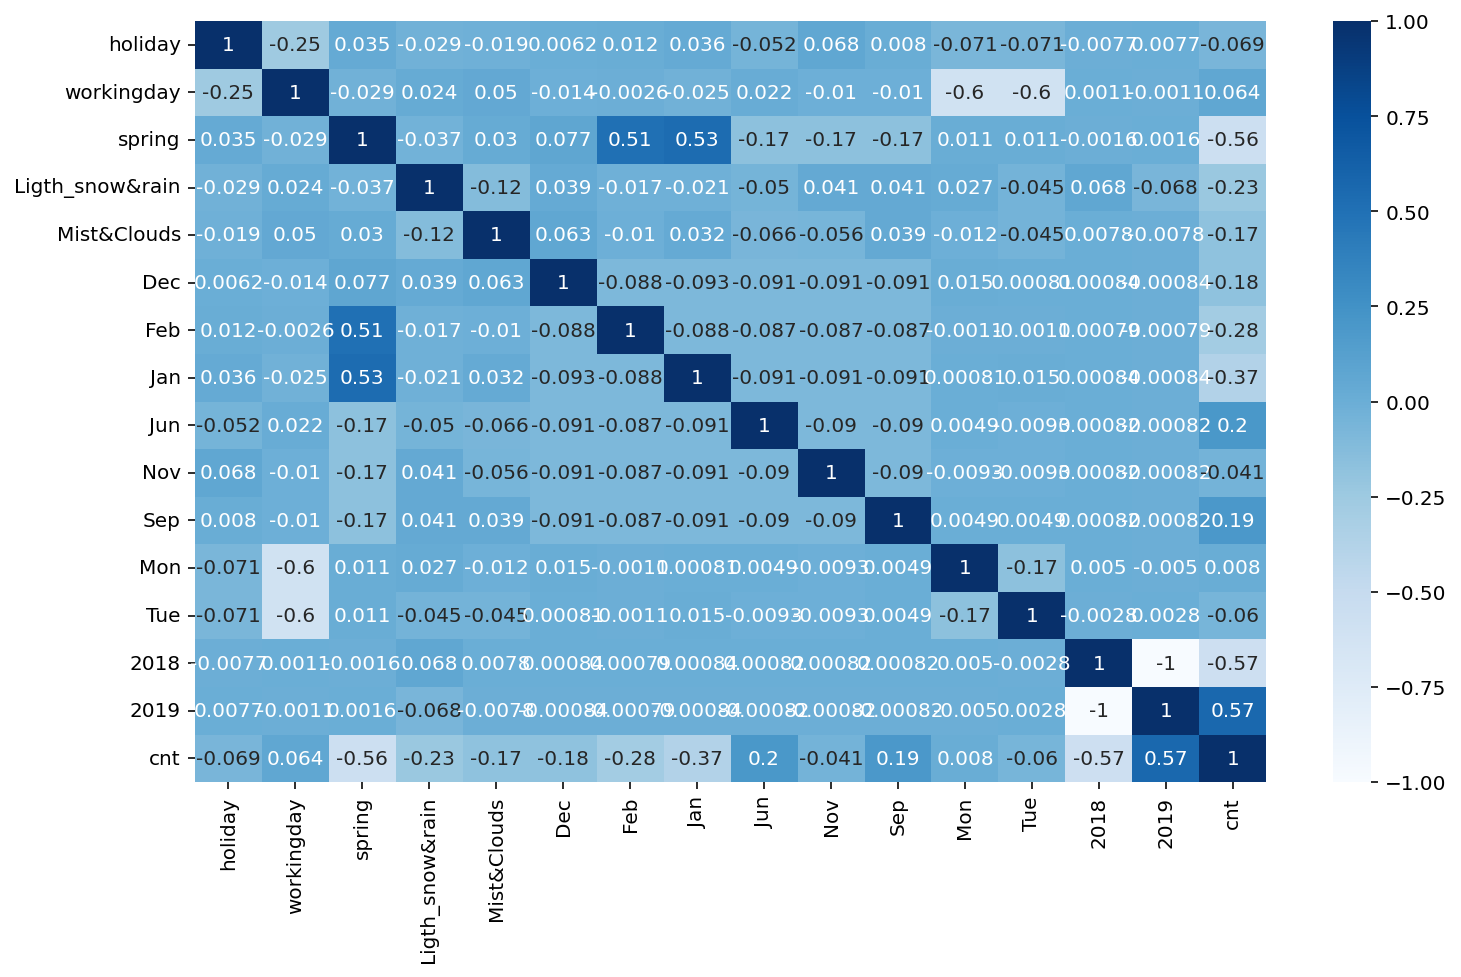

In [36]:
# Heatmap for features selected by REF
features.append('cnt')
sns.heatmap(data[features].corr(),cmap='Blues',annot=True)
plt.show()

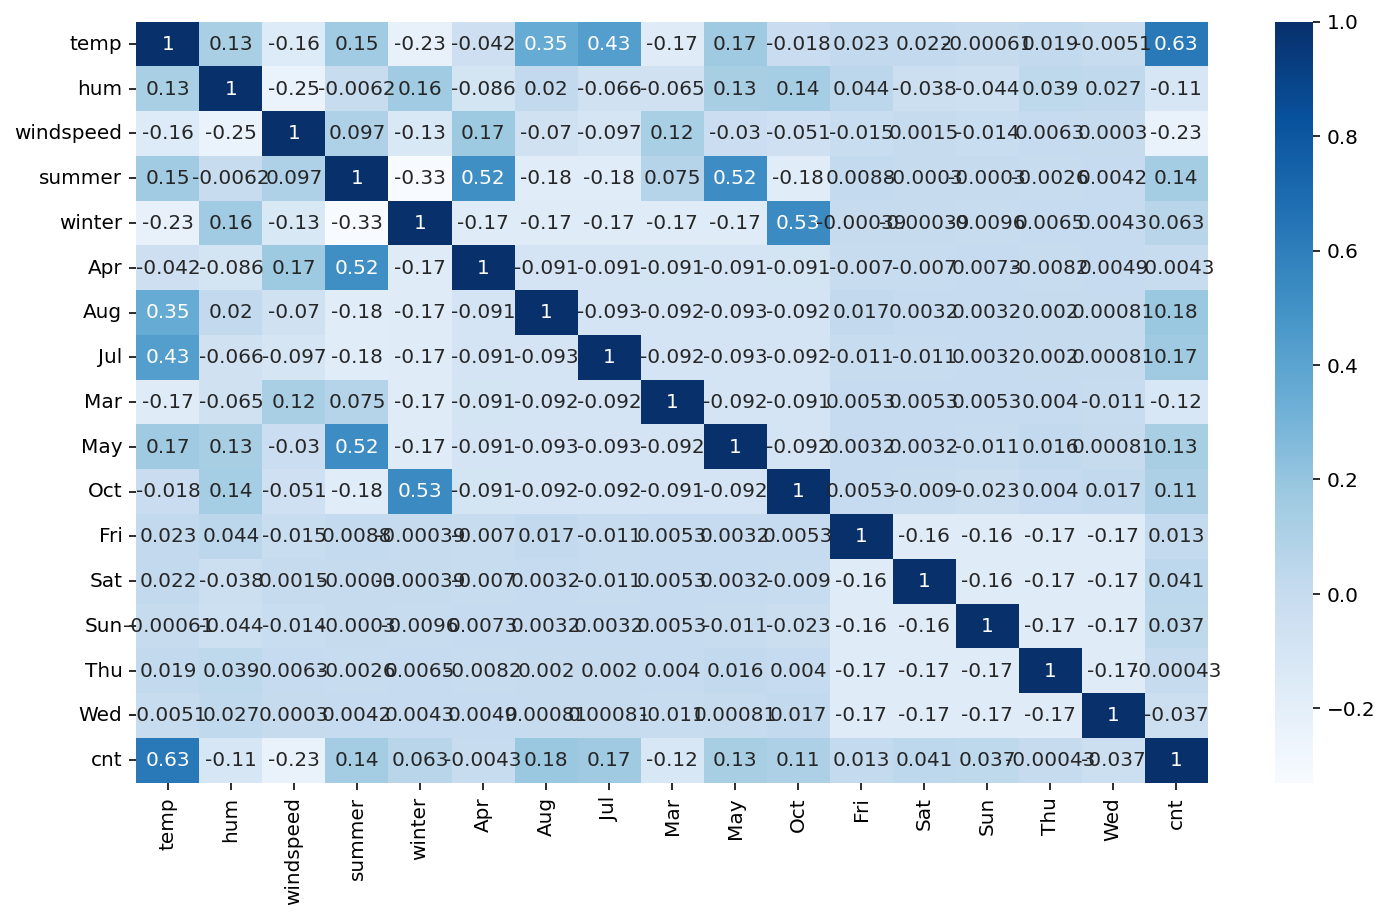

In [37]:
# List of features no selected by REF
no_ref = [i for i in data.columns if i not in features]
no_ref.append('cnt')

# Heatmap for features no selected by REF
sns.heatmap(data[no_ref].corr(),cmap='Blues',annot=True)
plt.show()

The features selected are temp, 2019, spring, Jan, windspeed, Ligth\_snow&rain, Mist&Clouds, and Sep. Those were selected by taking in account the correlation with target and avoiding multicollinearity with the other features.


In [38]:
#Separating features in independent and target
X = data[['temp','2019','spring','Jan','windspeed','Ligth_snow&rain','Mist&Clouds','Sep']]
y = data['cnt']

# Splitting train and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=13)

# Adding a constant 
X_train_sm = sm.add_constant(X_train)

# Fitting the model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.90e-178
Time:                        17:55:30   Log-Likelihood:                -4135.3
No. Observations:                 509   AIC:                             8289.
Df Residuals:                     500   BIC:                             8327.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2598.2291    186.574     13.926      0.000    2231.664    2964.794
temp               91.4855      6.390     14.317      0.000      78.931     104.040
2019             2054.3626     73.522     27.942      0.000    1909.913    2198.812
spring          -1262.2756    117.746    -10.720      0.000   -1493.614   -1030.937
Jan              -319.0479    155.324     -2.054      0.040    -624.216     -13.880
windspeed         -32.4564      7.136     -4.548      0.000     -46.476     -18.436
Ligth_snow&rain -2414.9433    239.207    -10.096      0.000   -2884.917   -1944.969
Mist&Clouds      -636.3730     78.536     -8.103      0.000    -790.674    -482.072
Sep               505.7835    141.001      3.587      0.000     228.756     782.811
==============================================================================
Omnibus:                       70.380   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.242
Skew:                          -0.733   Prob(JB):                     3.57e-36
Kurtosis:                       5.356   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model with 8 features has an adjusted R square of 0.812 which implies that model explain 81.2% of the data. the Prob\(F\-statistics\) is really small saying the model is significant. Also, the p\-values are under 0.05 tolerance meaning that all the features are significant. Let's verify the VIF.


In [39]:
#Calculating VIF

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
4        windspeed  5.27
0             temp  4.84
2           spring  2.12
1             2019  1.98
3              Jan  1.57
6      Mist&Clouds  1.47
7              Sep  1.17
5  Ligth_snow&rain  1.09

One features is in the limit _windspeed_ with VIF of 5.27. These VIF numbers are considered good because they are in the range for analysis that is 5 to 10. Due to the p\-values are perfect, it is considered that those variables are relevant for the model and will be taken in acount.


### Predictions

The following steps are analyzing residuals from the best model \(model number 4\) for the train set. With those results, the model will be applied to the test set and again residual will be calculated.


In [40]:
# Prediction for train set
y_train_pred = lr_model.predict(X_train_sm)

# r2 score

r2_train = r2_score(y_train,y_train_pred)
r2_train

0.8153125294269065

Surprisingly, the r square score increase with the test set to 0.815, which means that the model is explaining 81.5%  of the data



Let's analyze the results plotting residuals


<Figure size 864x504 with 0 Axes>

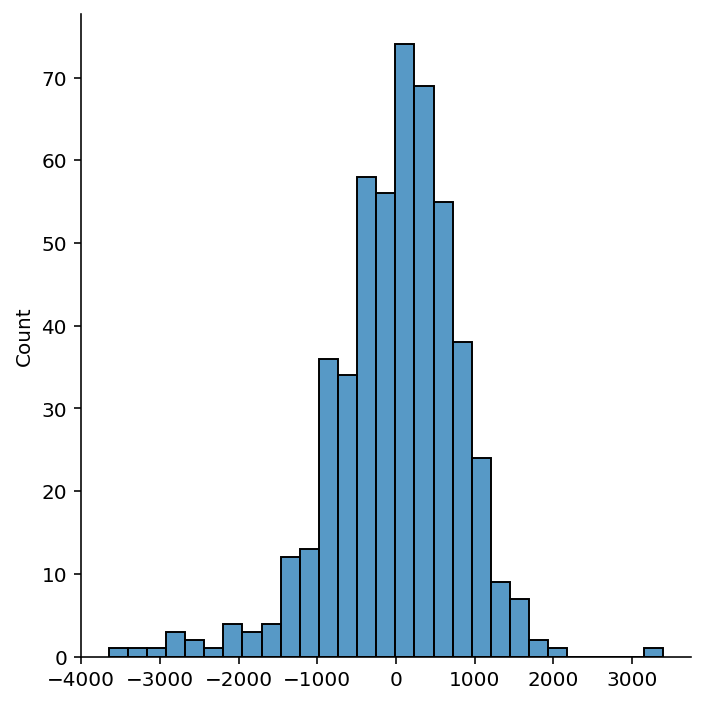

In [44]:
# Plotting residuals

res = y_train - y_train_pred
plt.figure()
sns.displot(res)

It is noticeable that residuals follow a normal distribution which confirm that the model is linear. Now let's evaluate the residual behavior compared with the two numerical variables windspeed and temp.



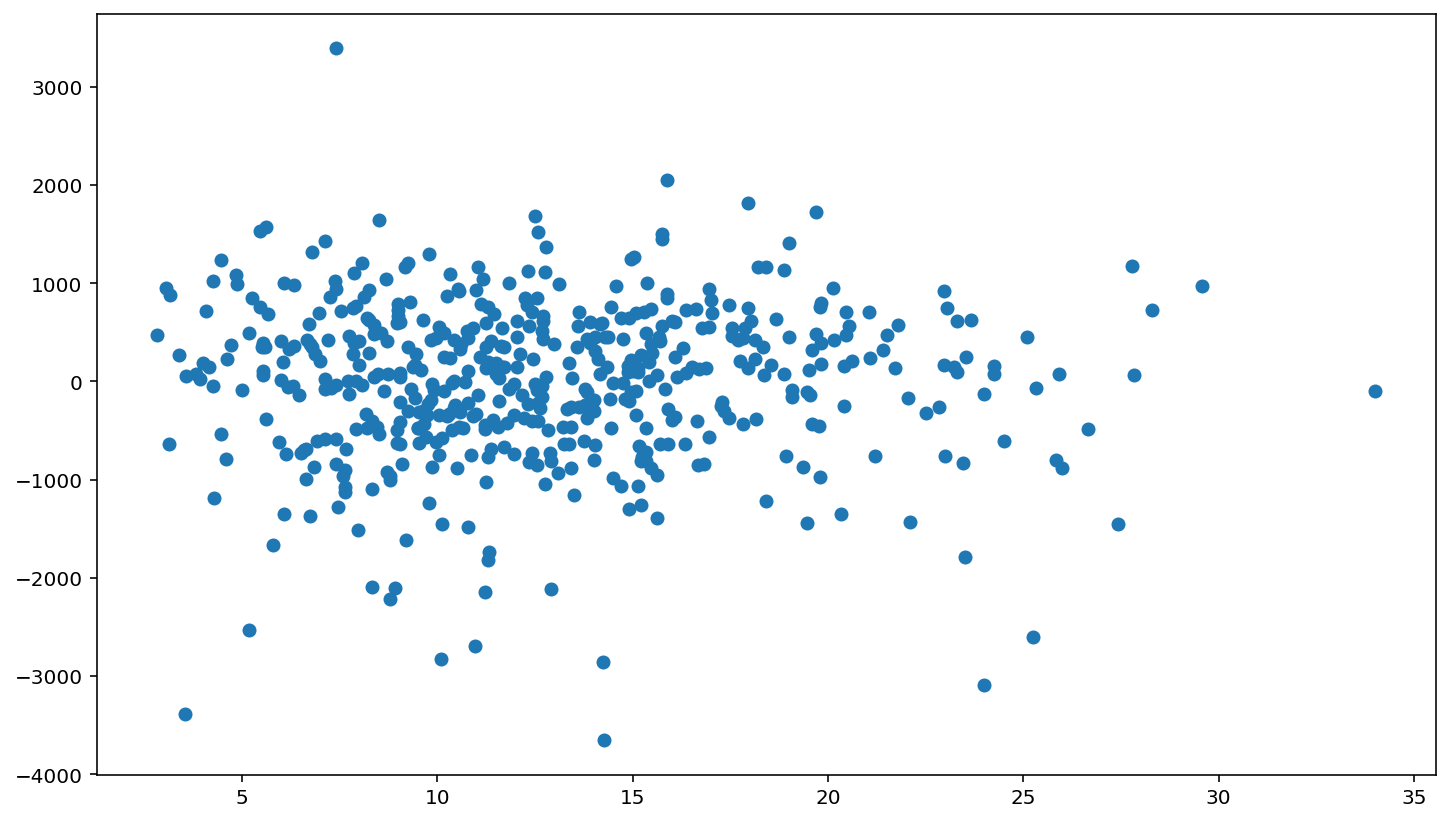

In [47]:
# Plotting residual agains windspeed

plt.scatter(X_train_sm['windspeed'],res)
plt.show()

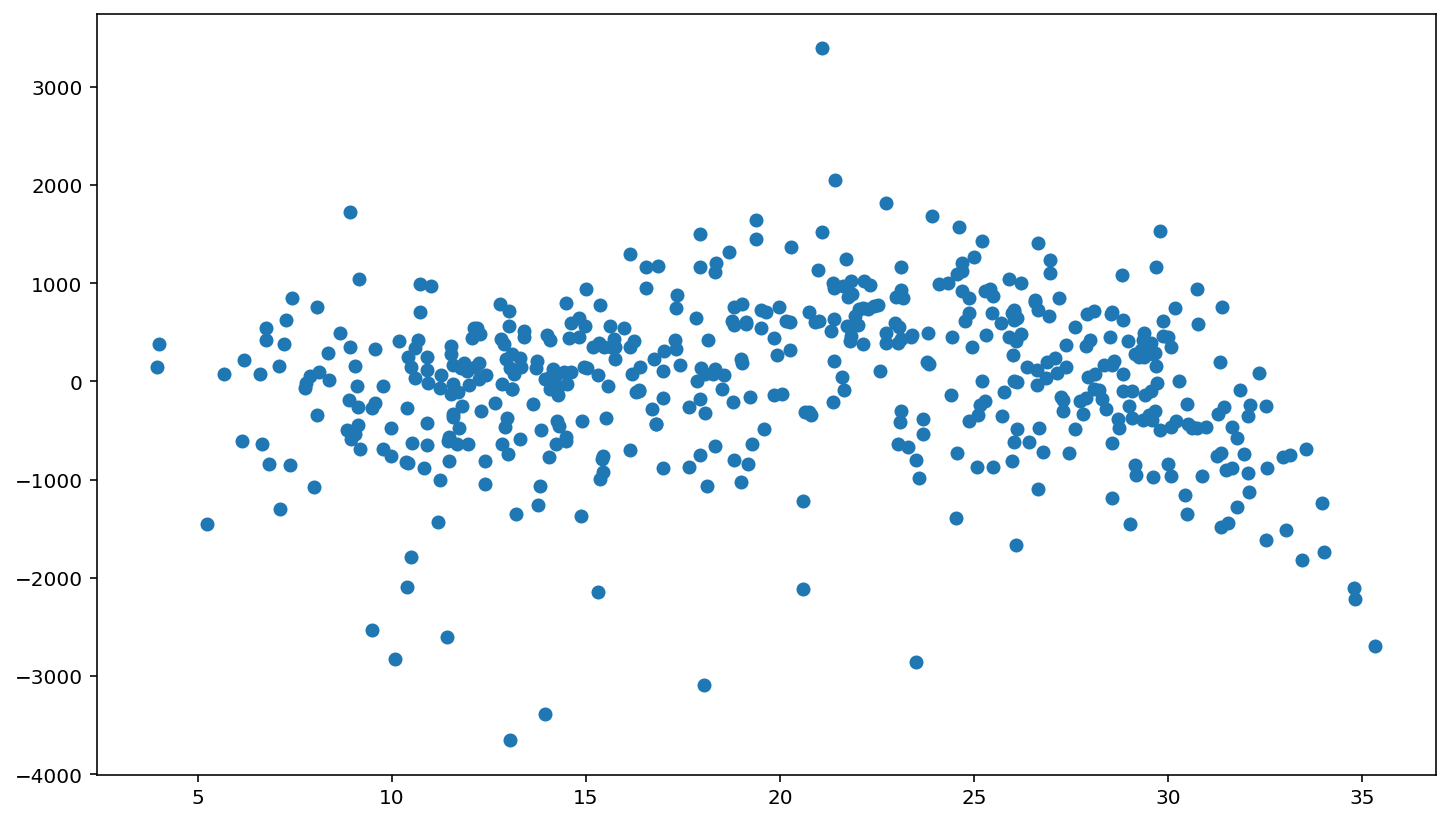

In [48]:
# Plotting residual agains temp

plt.scatter(X_train_sm['temp'],res)
plt.show()

Both graphs show no patter for residuals, what was one of the requirements for linear regression.

Let's plot the target with features used in the model to verify if they follow a linear graph for the numerical features. The features temp and windspeed are the only numerical. Temp is positive correlated with target and windspeed is negative correlated with target



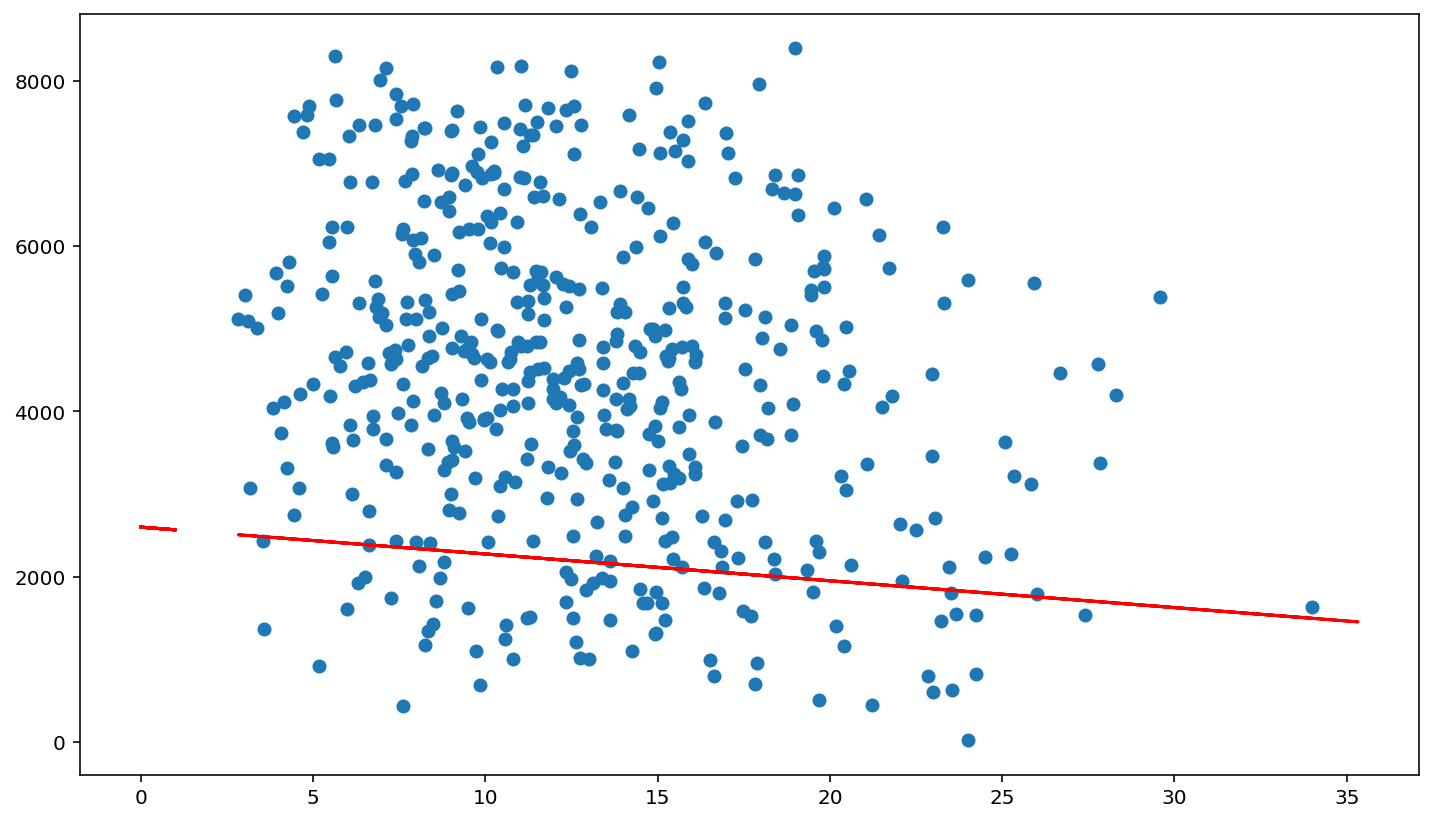

In [41]:
# Plotting windspeed with cnt

plt.scatter(X_train_sm['windspeed'],y_train)
plt.plot(X_train_sm,2598.2291 - 32.4564*X_train_sm,c='Red')
plt.show()

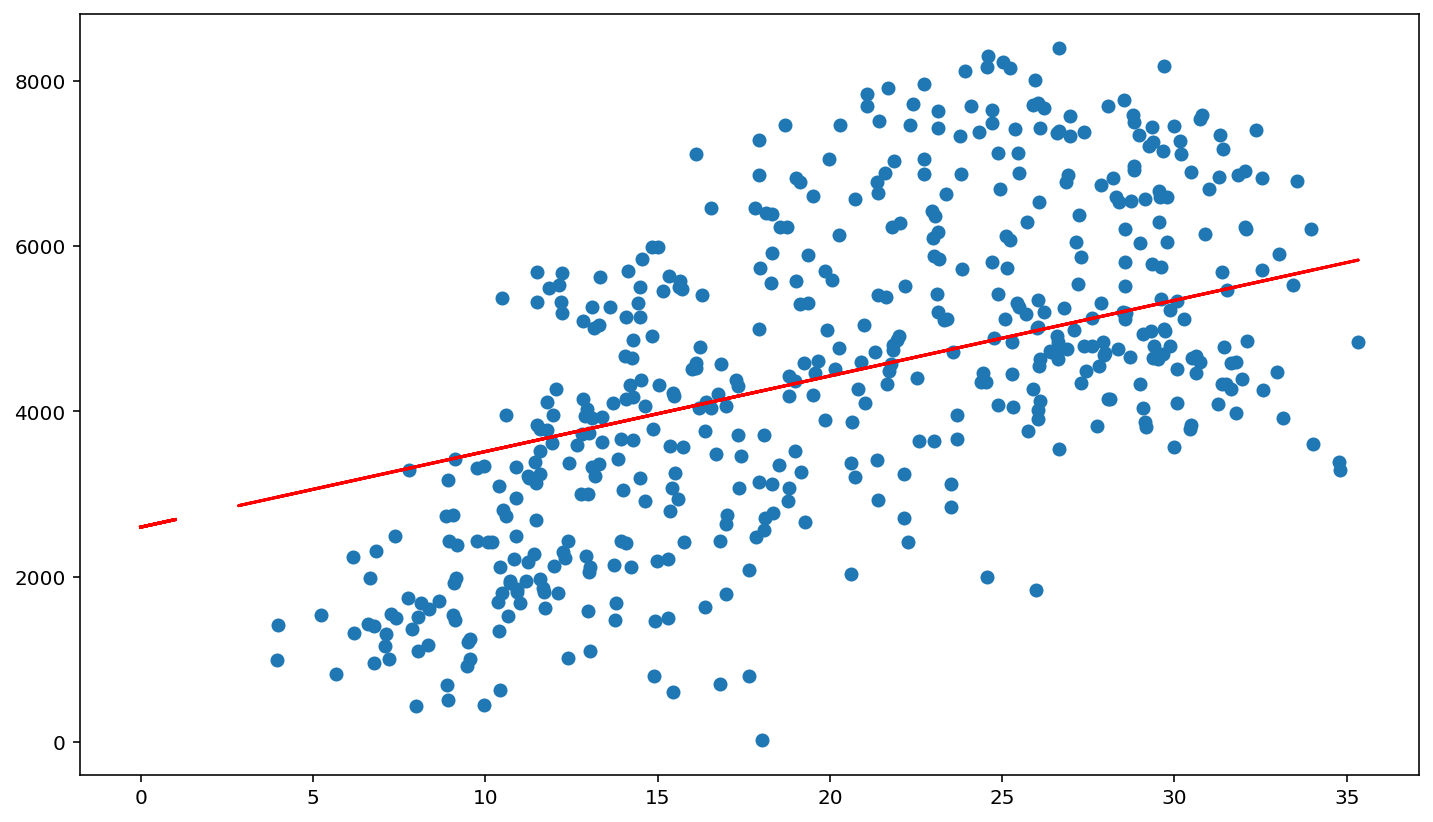

In [42]:
# Plotting temp with cnt

plt.scatter(X_train_sm['temp'],y_train)
plt.plot(X_train_sm,2598.2291 + 91.4855*X_train_sm,c='Red')
plt.show()

### Predicting for test set



In [43]:
# Adding a constant to the test set
X_test_sm = sm.add_constant(X_test)
# Prediction for test set
y_test_pred = lr_model.predict(X_test_sm)

#r2 score
r2_test = r2_score(y_test,y_test_pred)
r2_test

0.8084488653439907

The R square score for the test set is 0.808, which is pretty good because explain the 80.8% of the data


In summary, the best model is the third one with a R square of 0.808 in test set, which contain eight features as follow:

- temp
- 2019
- spring
- Jan
- windspeed 
- Ligth\_snow&rain
- Mist&Clouds
- Sep

